# Оптимизация потребления электроэнергии на металлургическом производстве 🏭

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Требуется построить модель, которая предскажет температуру стали.

<h2 font size="5">Введение. Технологический процесс 🛠</h2>

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. slab, «плита»).

<h2 font size="5">Введение. Описание данных 📃</h2>

Данные состоят из файлов, полученных из разных источников:

- <tt>data_arc_new.csv</tt> — данные об электродах;
- <tt>data_bulk_new.csv</tt> — данные о подаче сыпучих материалов (объём);
- <tt>data_bulk_time_new.csv</tt> — данные о подаче сыпучих материалов (время);
- <tt>data_gas_new.csv</tt> — данные о продувке сплава газом;
- <tt>data_temp_new.csv</tt> — результаты измерения температуры;
- <tt>data_wire_new.csv</tt> — данные о проволочных материалах (объём);
- <tt>data_wire_time_new.csv</tt> — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

<h2 font size="5">Введение. План работы 📑</h2>

✔️ **Шаг 1. Оценка технического задания заказчика.**

- Изучение основных сведений о реализуемой задаче;
- Формулировка плана работы над проектом;
- Формулировка задач, реализуемых в ходе проекта;
- Формулировка первоначальных идей по реализации целей проекта;

✔️ **Шаг 2. Исследовательский анализ данных**

- Изучение данных;
- Изучение основной информации об исходных данных;
- Оценка полученной информации для выполнения следующего этапа;

✔️ **Шаг 3. Предобработка данных**

- Нормализация/стандартизация значений;
- Устранение пропущенных значений;
- Удаление неинформативных/коллинеарных признаков;
- Изменение типов данных в признаках;
- Добавление новых признаков;
- Создание и сохранение предобработанных выборок с данными;
- Разделение данных на тренировочную, валидационную и тестовую выборки;

✔️ **Шаг 4. Выбор модели**
- Формирования пула моделей для их обучения;
- Обучение моделей, подбор гиперпараметров;
- Оценка качества моделей при помощи кросс-валидации;
- Выбор модели для тестирования;

✔️ **Шаг 5. Тестирование модели**
- Проверка качества модели на тестовой выборке;
- Проверка модели на адекватность;

✔️ **Шаг 6. Общий вывод**
- Подведение итогов проекта.

<h2 font size="5">Введение. Цель проекта 🎯</h2>

Разработать прототип модели машинного обучения для прогнозирования температуры сплава со значением метрики <tt>MAE</tt> на тестовой выборке не более <tt>6.8</tt>.

<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение.-Технологический-процесс-🛠" data-toc-modified-id="Введение.-Технологический-процесс-🛠-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение. Технологический процесс 🛠</a></span></li><li><span><a href="#Введение.-Описание-данных-📃" data-toc-modified-id="Введение.-Описание-данных-📃-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Введение. Описание данных 📃</a></span></li><li><span><a href="#Введение.-План-работы-📑" data-toc-modified-id="Введение.-План-работы-📑-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Введение. План работы 📑</a></span></li><li><span><a href="#Введение.-Цель-проекта-🎯" data-toc-modified-id="Введение.-Цель-проекта-🎯-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Введение. Цель проекта 🎯</a></span></li><li><span><a href="#Шаг-1.-Оценка-ТЗ-📃" data-toc-modified-id="Шаг-1.-Оценка-ТЗ-📃-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 1. Оценка ТЗ 📃</a></span></li><li><span><a href="#Шаг-2.-Исследовательский-анализ-данных-👨🏻‍🔬" data-toc-modified-id="Шаг-2.-Исследовательский-анализ-данных-👨🏻‍🔬-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Шаг 2. Исследовательский анализ данных 👨🏻‍🔬</a></span><ul class="toc-item"><li><span><a href="#Используемые-библиотеки" data-toc-modified-id="Используемые-библиотеки-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Используемые библиотеки</a></span></li><li><span><a href="#Получение-данных" data-toc-modified-id="Получение-данных-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Получение данных</a></span></li><li><span><a href="#Общая-информация-о-данных" data-toc-modified-id="Общая-информация-о-данных-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Общая информация о данных</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#data_arc_new.csv" data-toc-modified-id="data_arc_new.csv-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span><tt>data_arc_new.csv</tt></a></span></li><li><span><a href="#data_bulk_new.csv" data-toc-modified-id="data_bulk_new.csv-6.4.2"><span class="toc-item-num">6.4.2&nbsp;&nbsp;</span><tt>data_bulk_new.csv</tt></a></span></li><li><span><a href="#data_bulk_time_new.csv" data-toc-modified-id="data_bulk_time_new.csv-6.4.3"><span class="toc-item-num">6.4.3&nbsp;&nbsp;</span><tt>data_bulk_time_new.csv</tt></a></span></li><li><span><a href="#data_gas_new.csv" data-toc-modified-id="data_gas_new.csv-6.4.4"><span class="toc-item-num">6.4.4&nbsp;&nbsp;</span><tt>data_gas_new.csv</tt></a></span></li><li><span><a href="#data_temp_new.csv" data-toc-modified-id="data_temp_new.csv-6.4.5"><span class="toc-item-num">6.4.5&nbsp;&nbsp;</span><tt>data_temp_new.csv</tt></a></span></li><li><span><a href="#data_wire_new.csv" data-toc-modified-id="data_wire_new.csv-6.4.6"><span class="toc-item-num">6.4.6&nbsp;&nbsp;</span><tt>data_wire_new.csv</tt></a></span></li><li><span><a href="#data_wire_time_new.csv" data-toc-modified-id="data_wire_time_new.csv-6.4.7"><span class="toc-item-num">6.4.7&nbsp;&nbsp;</span><tt>data_wire_time_new.csv</tt></a></span></li></ul></li><li><span><a href="#Итого" data-toc-modified-id="Итого-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Шаг-3.-Предобработка-данных-⚙️" data-toc-modified-id="Шаг-3.-Предобработка-данных-⚙️-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Шаг 3. Предобработка данных ⚙️</a></span><ul class="toc-item"><li><span><a href="#Переименование-признаков-в-snake_case" data-toc-modified-id="Переименование-признаков-в-snake_case-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Переименование признаков в <tt>snake_case</tt></a></span></li><li><span><a href="#data_temp_new.temp" data-toc-modified-id="data_temp_new.temp-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span><tt>data_temp_new.temp</tt></a></span><ul class="toc-item"><li><span><a href="#data_temp_new.temp-<-1500-" data-toc-modified-id="data_temp_new.temp-<-1500--7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span><tt>data_temp_new.temp &lt; 1500 </tt></a></span></li></ul></li><li><span><a href="#data_wire_new-&amp;-data_bulk_new" data-toc-modified-id="data_wire_new-&amp;-data_bulk_new-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span><tt>data_wire_new</tt> &amp; <tt>data_bulk_new</tt></a></span></li><li><span><a href="#data_arc_new" data-toc-modified-id="data_arc_new-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span><tt>data_arc_new</tt></a></span><ul class="toc-item"><li><span><a href="#data_arc_new.reactive_power-<-0" data-toc-modified-id="data_arc_new.reactive_power-<-0-7.4.1"><span class="toc-item-num">7.4.1&nbsp;&nbsp;</span><tt>data_arc_new.reactive_power &lt; 0</tt></a></span></li><li><span><a href="#data_arc_new.warming_iterations" data-toc-modified-id="data_arc_new.warming_iterations-7.4.2"><span class="toc-item-num">7.4.2&nbsp;&nbsp;</span><tt>data_arc_new.warming_iterations</tt></a></span></li><li><span><a href="#data_arc_new.warming_time" data-toc-modified-id="data_arc_new.warming_time-7.4.3"><span class="toc-item-num">7.4.3&nbsp;&nbsp;</span><tt>data_arc_new.warming_time</tt></a></span></li></ul></li><li><span><a href="#Объединение-датасетов" data-toc-modified-id="Объединение-датасетов-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Объединение датасетов</a></span><ul class="toc-item"><li><span><a href="#data.full_power" data-toc-modified-id="data.full_power-7.5.1"><span class="toc-item-num">7.5.1&nbsp;&nbsp;</span><tt>data.full_power</tt></a></span></li></ul></li><li><span><a href="#Корреляции-признаков" data-toc-modified-id="Корреляции-признаков-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Корреляции признаков</a></span></li><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Значения-выбросы-в-тренировочной-выборке" data-toc-modified-id="Значения-выбросы-в-тренировочной-выборке-7.8"><span class="toc-item-num">7.8&nbsp;&nbsp;</span>Значения-выбросы в тренировочной выборке</a></span></li><li><span><a href="#RobustScaler" data-toc-modified-id="RobustScaler-7.9"><span class="toc-item-num">7.9&nbsp;&nbsp;</span><tt>RobustScaler</tt></a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-7.10"><span class="toc-item-num">7.10&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Шаг-4.-Выбор-модели-🦾" data-toc-modified-id="Шаг-4.-Выбор-модели-🦾-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Шаг 4. Выбор модели 🦾</a></span><ul class="toc-item"><li><span><a href="#GradientBoostingRegressor" data-toc-modified-id="GradientBoostingRegressor-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span><tt>GradientBoostingRegressor</tt></a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span><tt>CatBoostRegressor</tt></a></span></li><li><span><a href="#XGBRegressor" data-toc-modified-id="XGBRegressor-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span><tt>XGBRegressor</tt></a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span><tt>RandomForestRegressor</tt></a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span><tt>LinearRegression</tt></a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-8.6"><span class="toc-item-num">8.6&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Шаг-5.-Тестирование-модели-🧪" data-toc-modified-id="Шаг-5.-Тестирование-модели-🧪-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Шаг 5. Тестирование модели 🧪</a></span><ul class="toc-item"><li><span><a href="#Метрики-на-тестовой-выборке" data-toc-modified-id="Метрики-на-тестовой-выборке-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Метрики на тестовой выборке</a></span></li><li><span><a href="#DummyRegressor,-проверка-модели-на-адекватность" data-toc-modified-id="DummyRegressor,-проверка-модели-на-адекватность-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span><tt>DummyRegressor</tt>, проверка модели на адекватность</a></span></li><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Важность признаков</a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Шаг-6.-Общий-вывод-👀" data-toc-modified-id="Шаг-6.-Общий-вывод-👀-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Шаг 6. Общий вывод 👀</a></span><ul class="toc-item"><li><span><a href="#Краткая-сводка-по-выполненным-задачам" data-toc-modified-id="Краткая-сводка-по-выполненным-задачам-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Краткая сводка по выполненным задачам</a></span><ul class="toc-item"><li><span><a href="#Введение." data-toc-modified-id="Введение.-10.1.1"><span class="toc-item-num">10.1.1&nbsp;&nbsp;</span>Введение.</a></span></li><li><span><a href="#Шаг-1.-Оценка-ТЗ" data-toc-modified-id="Шаг-1.-Оценка-ТЗ-10.1.2"><span class="toc-item-num">10.1.2&nbsp;&nbsp;</span>Шаг 1. Оценка ТЗ</a></span></li><li><span><a href="#Шаг-2.-Исследовательский-анализ-данных" data-toc-modified-id="Шаг-2.-Исследовательский-анализ-данных-10.1.3"><span class="toc-item-num">10.1.3&nbsp;&nbsp;</span>Шаг 2. Исследовательский анализ данных</a></span></li><li><span><a href="#Шаг-3.-Предобработка-данных" data-toc-modified-id="Шаг-3.-Предобработка-данных-10.1.4"><span class="toc-item-num">10.1.4&nbsp;&nbsp;</span>Шаг 3. Предобработка данных</a></span></li><li><span><a href="#Шаг-4.-Обучение-моделей" data-toc-modified-id="Шаг-4.-Обучение-моделей-10.1.5"><span class="toc-item-num">10.1.5&nbsp;&nbsp;</span>Шаг 4. Обучение моделей</a></span></li><li><span><a href="#Шаг-5.-Тестирование-модели" data-toc-modified-id="Шаг-5.-Тестирование-модели-10.1.6"><span class="toc-item-num">10.1.6&nbsp;&nbsp;</span>Шаг 5. Тестирование модели</a></span></li></ul></li><li><span><a href="#Что-могло-привести-к-получению-неполноценных-результатов?" data-toc-modified-id="Что-могло-привести-к-получению-неполноценных-результатов?-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Что могло привести к получению неполноценных результатов?</a></span></li></ul></li><li><span><a href="#Отчет-о-проделанной-работе-✅" data-toc-modified-id="Отчет-о-проделанной-работе-✅-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Отчет о проделанной работе ✅</a></span><ul class="toc-item"><li><span><a href="#Сравнение-приведенного-решения-и-плана-работы" data-toc-modified-id="Сравнение-приведенного-решения-и-плана-работы-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Сравнение приведенного решения и плана работы</a></span><ul class="toc-item"><li><span><a href="#Шаг-1.-Оценка-технического-задания-|-✅-[100%-выполнение-этапа]" data-toc-modified-id="Шаг-1.-Оценка-технического-задания-|-✅-[100%-выполнение-этапа]-11.1.1"><span class="toc-item-num">11.1.1&nbsp;&nbsp;</span>Шаг 1. Оценка технического задания | ✅ [100% выполнение этапа]</a></span></li><li><span><a href="#Шаг-2.-Исследовательский-анализ-данных-|-✅-[100%-выполнение-этапа]" data-toc-modified-id="Шаг-2.-Исследовательский-анализ-данных-|-✅-[100%-выполнение-этапа]-11.1.2"><span class="toc-item-num">11.1.2&nbsp;&nbsp;</span>Шаг 2. Исследовательский анализ данных | ✅ [100% выполнение этапа]</a></span></li><li><span><a href="#Шаг-3.-Предобработка-данных-|-✅-[100%-выполнение-этапа]" data-toc-modified-id="Шаг-3.-Предобработка-данных-|-✅-[100%-выполнение-этапа]-11.1.3"><span class="toc-item-num">11.1.3&nbsp;&nbsp;</span>Шаг 3. Предобработка данных | ✅ [100% выполнение этапа]</a></span></li><li><span><a href="#Шаг-4.-Выбор-модели-|-✅-[100%-выполнение-этапа]" data-toc-modified-id="Шаг-4.-Выбор-модели-|-✅-[100%-выполнение-этапа]-11.1.4"><span class="toc-item-num">11.1.4&nbsp;&nbsp;</span>Шаг 4. Выбор модели | ✅ [100% выполнение этапа]</a></span></li><li><span><a href="#Шаг-5.-Тестирование-модели-|-✅-[100%-выполнение-этапа]" data-toc-modified-id="Шаг-5.-Тестирование-модели-|-✅-[100%-выполнение-этапа]-11.1.5"><span class="toc-item-num">11.1.5&nbsp;&nbsp;</span>Шаг 5. Тестирование модели | ✅ [100% выполнение этапа]</a></span></li><li><span><a href="#Шаг-6.-Общий-вывод-|-✅-[100%-выполнение-этапа]" data-toc-modified-id="Шаг-6.-Общий-вывод-|-✅-[100%-выполнение-этапа]-11.1.6"><span class="toc-item-num">11.1.6&nbsp;&nbsp;</span>Шаг 6. Общий вывод | ✅ [100% выполнение этапа]</a></span></li></ul></li><li><span><a href="#Описание-трудностей-проекта-и-способов-их-решения" data-toc-modified-id="Описание-трудностей-проекта-и-способов-их-решения-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Описание трудностей проекта и способов их решения</a></span></li><li><span><a href="#Описание-ключевых-шагов-решения" data-toc-modified-id="Описание-ключевых-шагов-решения-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Описание ключевых шагов решения</a></span></li><li><span><a href="#Признаки,-использовавшиеся-для-обучения-модели" data-toc-modified-id="Признаки,-использовавшиеся-для-обучения-модели-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Признаки, использовавшиеся для обучения модели</a></span></li><li><span><a href="#Описание-итоговой-модели" data-toc-modified-id="Описание-итоговой-модели-11.5"><span class="toc-item-num">11.5&nbsp;&nbsp;</span>Описание итоговой модели</a></span></li></ul></li></ul></div>

## Шаг 1. Оценка ТЗ 📃

<font size="3">**Общая суть**</font>

Согласно поручению заказчика нам требуется разработать модель машинного обучения, которая будет прогнозировать один из ключевых показателей процесса производства. Его значение влияет на конечное значение затраченной электроэнергии на партию товара. Ее расход требуется оптимизировать, что в масштабах промышленного процесса сэкономит компании солидную сумму денег.

<font size="3">**План работы**</font>

План был подробно описан во введении.

[Посмотреть план работы](#Введение.-План-работы-📑)

<font size="3">**Задачи проекта**</font>

1. Провести корректную предобработку данных и получить готовый для обучения и тестирования моделей датафрейм;
2. Рассмотреть и проверить при помощи кросс-валидации эффективность минимум 2-х разных моделей;
3. Подобрать наиболее подходящие гиперпараметры моделей и воспользоваться одной или несколькими техниками для улучшения качества предсказаний модели.

<font size="3">**Первичные мысли по реализации проекта**</font>

<tt>Раздел был выделен, чтобы подробнее понять мой личный ход мыслей перед началом работы над проектом. Пусть он будет в некотором смысле текстовой интерпретацией ситуации, когда задача от заказчика только-только была сформулирована, но уже есть какие-то первые идеи того, как проект будет реализован, какие инструменты будет целесообразно применить и тд.</tt>

В первую очередь: решаем задачу **регрессии**. Данные представляют из себя несколько датасетов с различных этапов производства, поэтому вероятно потребуется выделение информативных признаков + создание новых, а также объединение всех их в один датасет.

Заказчику важна лишь конечная точность модели на тестовой выборке, поэтому можем пренебречь временем обучения моделей в пользу точности предсказаний. Это расширяет рассматриваемый пул алгоритмов.

Что касается визуального оформления проекта, то стоит использовать сводные таблицы на этапе предобработки данных, поскольку это позволит лучше воспринимать информацию по большому количеству выборок.

## Шаг 2. Исследовательский анализ данных 👨🏻‍🔬

### Используемые библиотеки

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from typing import *
from time import time
import urllib
import warnings
from IPython.display import HTML, display

%matplotlib inline

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 200)
pd.set_option('max_colwidth',150)
pd.options.display.float_format = '{:10,.2f}'.format

np.set_printoptions(suppress=True)

warnings.filterwarnings('ignore')

RANDOM_STATE = 280823

### Получение данных

In [2]:
labels = [('data_arc_new.csv', ['Начало нагрева дугой', 'Конец нагрева дугой']),
          ('data_bulk_new.csv', []),
          ('data_bulk_time_new.csv', [f'Bulk {i}' for i in range(1, 16)]),
          ('data_gas_new.csv', []),
          ('data_temp_new.csv', ['Время замера']),
          ('data_wire_new.csv', []),
          ('data_wire_time_new.csv', [f'Wire {i}' for i in range(1, 10)])]

datasets = []

try:
    for i, label in enumerate(labels):
        try:
            datasets.append(pd.read_csv(
                f'https://code.s3.yandex.net/datasets/{label[0]}', parse_dates=label[1]))
            datasets[i].name = label[0]
            print(f'✅ Датасет №{i+1} успешно прочитан c внешнего ресурса')
            display(datasets[i].head(10))
        except urllib.request.URLError:
            raise Exception(
                f'❌ Ошибка получения датасета №{i+1} с внешнего ресурса')


except:
    data_count = int(input(
        'Укажите кол-во датасетов для загрузки с локального хранилища (прим. \'3\'):\n'))

    for i in range(data_count):
        data_name = input(
            f'Укажите имя файла №{i+1} с данными в каталоге с проектом. Например: \'data.csv\'.\n'
            f'Если данные находятся не в каталоге с проектом нажмите Enter.\n\n')

        data_parse_dates = input(
            'Нужно ли указывать значение аргумента parse_dates? '
            'Напишите через запятую названия столбцов или нажмите Enter, если это не требуется')
        if not data_parse_dates:
            data_parse_dates = []
        else:
            data_parse_dates = [x.strip()
                                for x in data_parse_dates.split(', ')]

        if not data_name:
            while True:
                data_path = input('Введите абсолютный путь к датасету:\n')
                try:
                    datasets.append(pd.read_csv(
                        data_path, parse_dates=data_parse_dates))
                    datasets[i].name = data_path.split('/')[-1]
                    print(
                        f'✅ Датасет №{i+1} успешно прочитан по указанному пути')
                    display(datasets[i].head(10))
                    break

                except FileNotFoundError:
                    raise Exception(
                        f'❌Указан неверный путь к файлу: {data_path}')
        else:
            try:
                datasets.append(pd.read_csv(
                    data_name, parse_dates=data_parse_dates))
                datasets[i].name = data_name
                print(
                    f'✅ Датасет №{i+1} успешно прочитан из каталога с проектом')
                display(datasets[i].head(10))
            except FileNotFoundError:
                raise Exception(f'❌Указан не существующий файл: {data_name}')

✅ Датасет №1 успешно прочитан c внешнего ресурса


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.31,0.21
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.77,0.48
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.58,0.43
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.52,0.38
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.87,0.64
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.38,0.22
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.26,0.21
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.71,0.48
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.79,0.54
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.10,0.82


✅ Датасет №2 успешно прочитан c внешнего ресурса


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.00,NaN,150.00,154.00
1,2,NaN,NaN,NaN,73.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.00,NaN,149.00,154.00
2,3,NaN,NaN,NaN,34.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.00,NaN,152.00,153.00
3,4,NaN,NaN,NaN,81.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.00,NaN,153.00,154.00
4,5,NaN,NaN,NaN,78.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.00,NaN,151.00,152.00
5,6,NaN,NaN,NaN,117.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.00,NaN,201.00,154.00
6,7,NaN,NaN,NaN,117.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.00,NaN,152.00,154.00
7,8,NaN,NaN,NaN,99.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.00,NaN,252.00,153.00
8,9,NaN,NaN,NaN,117.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.00,NaN,99.00,203.00
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.00,NaN,102.00,204.00


✅ Датасет №3 успешно прочитан c внешнего ресурса


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaT,NaT,NaT,2019-05-03 12:32:39,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:27:13,NaT,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaT,NaT,NaT,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:58:00,NaT,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,2019-05-03 13:34:12,2019-05-03 13:30:47
5,6,NaT,NaT,NaT,2019-05-03 13:57:27,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:48:52,NaT,2019-05-03 14:09:42,2019-05-03 14:03:15
6,7,NaT,NaT,NaT,2019-05-03 14:18:58,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 14:41:26,NaT,2019-05-03 14:30:50,2019-05-03 14:27:16
7,8,NaT,NaT,NaT,2019-05-03 15:17:58,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 15:17:58,NaT,2019-05-03 15:13:18,2019-05-03 15:05:33
8,9,NaT,NaT,NaT,2019-05-03 16:03:08,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 16:03:08,NaT,2019-05-03 16:00:16,2019-05-03 15:52:39
9,10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 16:38:11,NaT,2019-05-03 16:34:24,2019-05-03 16:29:56


✅ Датасет №4 успешно прочитан c внешнего ресурса


,key,Газ 1
0,1,29.75
1,2,12.56
2,3,28.55
3,4,18.84
4,5,5.41
5,6,11.27
6,7,9.84
7,8,15.17
8,9,8.22
9,10,6.53


✅ Датасет №5 успешно прочитан c внешнего ресурса


,key,Время замера,Температура
0,1,2019-05-03 11:02:04,"1,571.00"
1,1,2019-05-03 11:07:18,"1,604.00"
2,1,2019-05-03 11:11:34,"1,618.00"
3,1,2019-05-03 11:18:04,"1,601.00"
4,1,2019-05-03 11:25:59,"1,606.00"
5,1,2019-05-03 11:30:38,"1,613.00"
6,2,2019-05-03 11:34:04,"1,581.00"
7,2,2019-05-03 11:38:40,"1,577.00"
8,2,2019-05-03 11:46:09,"1,589.00"
9,2,2019-05-03 11:49:38,"1,604.00"


✅ Датасет №6 успешно прочитан c внешнего ресурса


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.24,9.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.11,9.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.39,9.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.24,12.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN


✅ Датасет №7 успешно прочитан c внешнего ресурса


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5,6,2019-05-03 13:57:27,2019-05-03 13:48:52,NaT,NaT,NaT,NaT,NaT,NaT,NaT
6,7,2019-05-03 14:18:58,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
7,8,2019-05-03 15:01:30,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
8,9,2019-05-03 15:45:44,2019-05-03 15:39:37,NaT,NaT,NaT,NaT,NaT,NaT,NaT
9,10,2019-05-03 16:27:00,2019-05-03 16:22:36,NaT,NaT,NaT,NaT,NaT,NaT,NaT


Данных довольно много.

Чтобы не запутаться с нумерацией датасетов запишем их в отдельные переменные, которые будут названы как и .csv файлы

In [3]:
(data_arc_new, 
 data_bulk_new, 
 data_bulk_time_new, 
 data_gas_new, 
 data_temp_new, 
 data_wire_new, 
 data_wire_time_new) = datasets

### Общая информация о данных

Отлично! Теперь рассмотрим общую информацию о всех датасетах.

Данных много, поэтому хорошим решением будет всю выводимую информацию скомпоновывать в сводные таблицы.

In [4]:
data_info = []

for dataset in datasets:
    name = dataset.name
    dtypes = {str(k) : v for k, v in dataset.dtypes.value_counts().to_dict().items()}
    
    all_dtypes = ['object', 'float64', 'int64', 'datetime64[ns]'] 
    
    for dtype in all_dtypes:
        if dtype in dtypes.keys():
            continue
        else:
            dtypes[dtype] = 0
    
    size = dataset.shape
    
    data_info.append((name, dtypes, size))
    
data_info

[('data_arc_new.csv',
  {'float64': 2, 'datetime64[ns]': 2, 'int64': 1, 'object': 0},
  (14876, 5)),
 ('data_bulk_new.csv',
  {'float64': 15, 'int64': 1, 'object': 0, 'datetime64[ns]': 0},
  (3129, 16)),
 ('data_bulk_time_new.csv',
  {'datetime64[ns]': 15, 'int64': 1, 'object': 0, 'float64': 0},
  (3129, 16)),
 ('data_gas_new.csv',
  {'int64': 1, 'float64': 1, 'object': 0, 'datetime64[ns]': 0},
  (3239, 2)),
 ('data_temp_new.csv',
  {'int64': 1, 'float64': 1, 'datetime64[ns]': 1, 'object': 0},
  (18092, 3)),
 ('data_wire_new.csv',
  {'float64': 9, 'int64': 1, 'object': 0, 'datetime64[ns]': 0},
  (3081, 10)),
 ('data_wire_time_new.csv',
  {'datetime64[ns]': 9, 'int64': 1, 'object': 0, 'float64': 0},
  (3081, 10))]

Немного сложновато воспринимать информацию в таком виде, поэтому закинем ее в датафрейм

In [5]:
data_info_processed = []

for dataset_info in data_info:
    
    data_info_ = (dataset_info[0],
                  dataset_info[2][1], 
                  dataset_info[2][0], 
                  dataset_info[1]['object'], 
                  dataset_info[1]['float64'], 
                  dataset_info[1]['int64'],
                  dataset_info[1]['datetime64[ns]'])

    data_info_processed.append(data_info_)

df_info_cols = ('file_name',
                'features_amount',
                'object_amount',
                'obj_features_count',
                'float_features_count',
                'int_features_count',
                'dt_features_count')

data_info_df = pd.DataFrame(data_info_processed, columns=df_info_cols)
data_info_df

,file_name,features_amount,object_amount,obj_features_count,float_features_count,int_features_count,dt_features_count
0,data_arc_new.csv,5,14876,0,2,1,2
1,data_bulk_new.csv,16,3129,0,15,1,0
2,data_bulk_time_new.csv,16,3129,0,0,1,15
3,data_gas_new.csv,2,3239,0,1,1,0
4,data_temp_new.csv,3,18092,0,1,1,1
5,data_wire_new.csv,10,3081,0,9,1,0
6,data_wire_time_new.csv,10,3081,0,0,1,9


В нашем распоряжении данные о чуть более чем трёх тысячах партий стали.

В <tt>data_arc_new.csv</tt> и <tt>data_temp_new.csv</tt> объектов значительно больше, так как записи отражают измерения по одним и тем же партиям в разные периоды времени.

Данных довольно много, поэтому в процессе объединения данных в один датафрейм будем оставлять только самые информативные признаки.

### Обзор данных

Датасетов много, поэтому проведем краткую оценку для каждого из семи датафреймов

In [6]:
def nan_count(data):
    return HTML(pd.DataFrame(data.isna().sum(), columns=['Кол-во пропусков']).T.to_html())

#### <tt>data_arc_new.csv</tt>

<b><tt>data_arc_new.csv</tt></b> — данные об электродах

In [7]:
data_arc_new.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.31,0.21
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.77,0.48
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.58,0.43
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.52,0.38
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.87,0.64


In [8]:
data_arc_new.describe().T

,count,mean,std,min,25%,50%,75%,max
key,"14,876.00","1,615.22",934.57,1.00,806.00,"1,617.00","2,429.00","3,241.00"
Активная мощность,"14,876.00",0.66,0.26,0.22,0.47,0.60,0.83,1.46
Реактивная мощность,"14,876.00",0.44,5.87,-715.48,0.34,0.44,0.61,1.27


In [9]:
display(nan_count(data_arc_new))

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
Кол-во пропусков,0,0,0,0,0


Пропусков нет!

В этом датасете нас больше других признаков интересуют значения <tt>Активной мощности</tt>, так как именно этот показатель напрямую влияет на итоговое энергопотребление.

Посмотрим на распределение значений

In [10]:
def histboxplot(data, x: str, xlabel: str = None, ylabel: str = None, boxcolor: str = '#a4d7ce', histcolor: str = '#3bc9af'):
    
    '''
    Функция для построения гистограммы+ящика с усами для оценки распределения значений одного признака
    
    '''
    fig, (ax_boxplot, ax_histplot) = plt.subplots(2, figsize=(18, 8), sharex=True, 
                                                  gridspec_kw= {"height_ratios": (0.2, 1)})

    fig.suptitle(
        f'Ящик с усами и гистограмма распределения значений. {data.name}.{x}', fontsize=16)
    
    desc = data[x].describe()

    mean = desc.loc['mean']
    median = desc.loc['50%']

    sns.boxplot(x=data[x],
                ax=ax_boxplot,
                color=boxcolor)

    ax_boxplot.set(xlabel='')

    sns.histplot(x=data[x],
                 color=histcolor,
                 kde=True)

    ax_boxplot.axvline(mean, 
                       color='#DC143C', 
                       linestyle=':', 
                       linewidth=2, 
                       label=f'Среднее: {np.round(mean, 1)}')

    ax_boxplot.axvline(median, 
                       color='#7CFC00', 
                       linestyle=':', 
                       linewidth=2, 
                       label=f'Медиана: {np.round(median, 1)}')


    ax_histplot.axvline(mean, 
                        color='#DC143C', 
                        linestyle=':', 
                        linewidth=2, 
                        label=f'Среднее: {np.round(mean, 1)}')

    ax_histplot.axvline(median, 
                        color='#7CFC00', 
                        linestyle=':', 
                        linewidth=2, 
                        label=f'Медиана: {np.round(median, 1)}')


    ax_histplot.legend()
    
    if xlabel is not None:
        ax_histplot.set_xlabel(xlabel)
    if ylabel is not None:
        ax_histplot.set_ylabel(ylabel)

    plt.show()

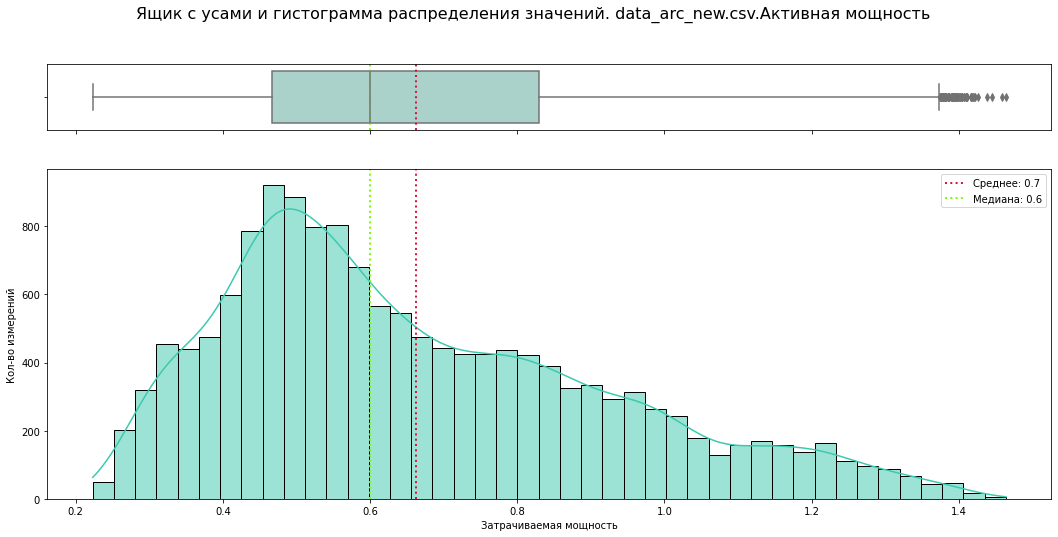

In [11]:
histboxplot(data_arc_new, 'Активная мощность', 'Затрачиваемая мощность', 'Кол-во измерений')

Распределение выглядит нормально. Присутствует левая скошенность. Вероятно, кому-то уже довелось решать задачу сокращения энергопотребления на этом заводе)

#### <tt>data_bulk_new.csv</tt>

<b><tt>data_bulk_new.csv</tt></b> — данные о подаче сыпучих материалов (объём) 

In [12]:
data_bulk_new.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.00,NaN,150.00,154.00
1,2,NaN,NaN,NaN,73.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.00,NaN,149.00,154.00
2,3,NaN,NaN,NaN,34.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.00,NaN,152.00,153.00
3,4,NaN,NaN,NaN,81.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.00,NaN,153.00,154.00
4,5,NaN,NaN,NaN,78.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.00,NaN,151.00,152.00


In [13]:
data_bulk_new.describe().T

,count,mean,std,min,25%,50%,75%,max
key,"3,129.00","1,624.38",933.34,1.00,816.00,"1,622.00","2,431.00","3,241.00"
Bulk 1,252.00,39.24,18.28,10.00,27.00,31.00,46.00,185.00
Bulk 2,22.00,253.05,21.18,228.00,242.00,251.50,257.75,325.00
Bulk 3,"1,298.00",113.88,75.48,6.00,58.00,97.50,152.00,454.00
Bulk 4,"1,014.00",104.39,48.18,12.00,72.00,102.00,133.00,281.00
Bulk 5,77.00,107.03,81.79,11.00,70.00,86.00,132.00,603.00
Bulk 6,576.00,118.93,72.06,17.00,69.75,100.00,157.00,503.00
Bulk 7,25.00,305.60,191.02,47.00,155.00,298.00,406.00,772.00
Bulk 8,1.00,49.00,NaN,49.00,49.00,49.00,49.00,49.00
Bulk 9,19.00,76.32,21.72,63.00,66.00,68.00,70.50,147.00


In [14]:
display(nan_count(data_bulk_new))

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
Кол-во пропусков,0,2877,3107,1831,2115,3052,2553,3104,3128,3110,2953,2952,679,3111,323,881


Наблюдается явная популярность одних добавок относительно других. 

Различное количество пропусков в признаках тому подтверждение.

In [15]:
data_bulk_new.key.is_monotonic

True

Значения <tt>key</tt> уникальны. Записи для разных партий здесь не повторяются

#### <tt>data_bulk_time_new.csv</tt>

<b><tt>data_bulk_time_new.csv</tt></b> — данные о подаче сыпучих материалов (время)

In [16]:
data_bulk_time_new.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaT,NaT,NaT,2019-05-03 12:32:39,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:27:13,NaT,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaT,NaT,NaT,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:58:00,NaT,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,2019-05-03 13:34:12,2019-05-03 13:30:47


In [17]:
display(nan_count(data_bulk_time_new))

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
Кол-во пропусков,0,2877,3107,1831,2115,3052,2553,3104,3128,3110,2953,2952,679,3111,323,881


In [18]:
data_bulk_time_new.key.is_monotonic

True

Пропусков вроде столько же, сколько их и в датасете <tt>data_bulk_new.csv</tt>, данные ведь связаны.

Значение <tt>key</tt> монотонно.

#### <tt>data_gas_new.csv</tt>

<b><tt>data_gas_new.csv</tt></b> — данные о продувке сплава газом

In [19]:
data_gas_new.head()

,key,Газ 1
0,1,29.75
1,2,12.56
2,3,28.55
3,4,18.84
4,5,5.41


In [20]:
data_gas_new.describe().T

,count,mean,std,min,25%,50%,75%,max
key,"3,239.00","1,621.86",935.39,1.00,812.50,"1,622.00","2,431.50","3,241.00"
Газ 1,"3,239.00",11.00,6.22,0.01,7.04,9.84,13.77,78.00


Тут, как и в <tt>data_arc_new.csv</tt>, стоит рассмотреть распределение значений признака <tt>Газ 1</tt>. Мало ли выбросы какие-то закрались...

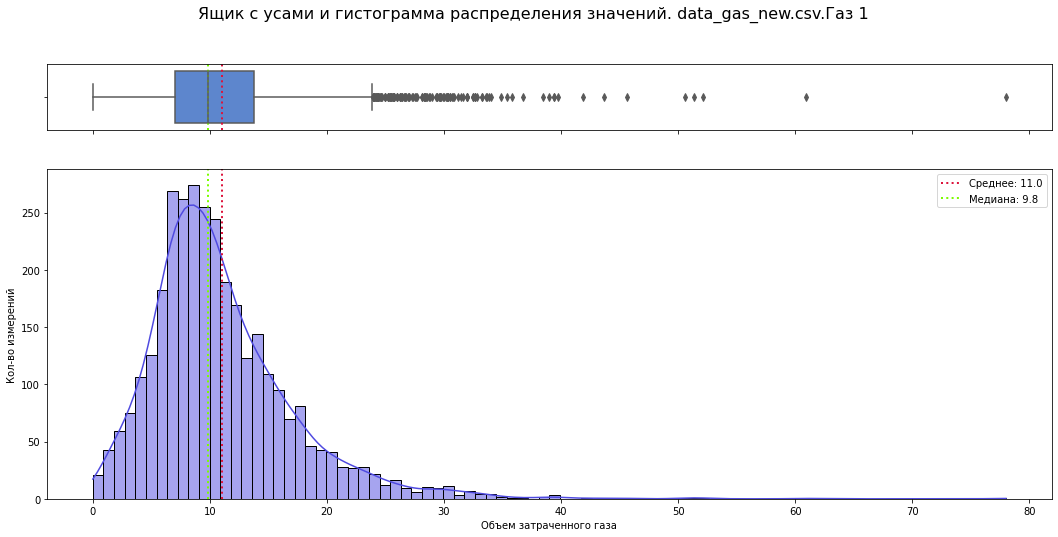

In [21]:
histboxplot(data_gas_new, 'Газ 1', 'Объем затраченного газа', 'Кол-во измерений', '#4a81e0', '#4f4ae0')

Тут выбросы присутствуют. Учтем это, когда будем предобрабатывать данные

In [22]:
data_gas_new.key.is_monotonic

True

Значение <tt>key</tt> по-прежнему монотонно возрастает

#### <tt>data_temp_new.csv</tt>

<b><tt>data_temp_new.csv</tt></b> — результаты измерения температуры

In [23]:
data_temp_new.head()

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,"1,571.00"
1,1,2019-05-03 11:07:18,"1,604.00"
2,1,2019-05-03 11:11:34,"1,618.00"
3,1,2019-05-03 11:18:04,"1,601.00"
4,1,2019-05-03 11:25:59,"1,606.00"


Вот и данные с так нужными нам целевыми значениями температуры. Пока просто оценим общую картину в распределении. Аргегировать данные будем на этапе предобработки данных.

In [24]:
data_temp_new.describe().T

,count,mean,std,min,25%,50%,75%,max
key,"18,092.00","1,616.46",934.64,1.00,807.75,"1,618.00","2,429.00","3,241.00"
Температура,"14,665.00","1,590.72",20.39,"1,191.00","1,580.00","1,590.00","1,599.00","1,705.00"


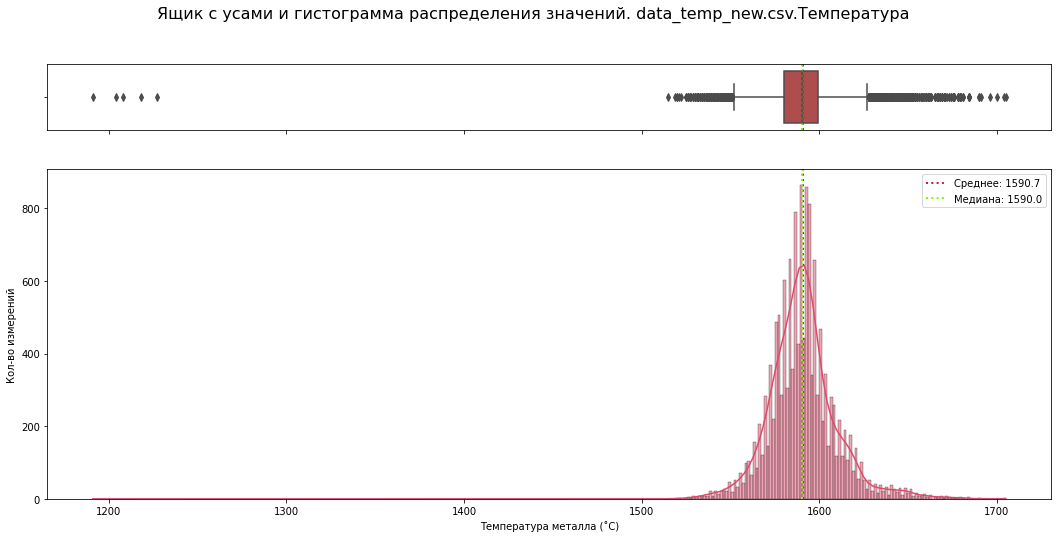

In [25]:
histboxplot(data_temp_new, 'Температура', 'Температура металла (˚С)', 'Кол-во измерений', '#bd3d3e', '#e04a6a')

Выбросы тоже есть. С ними, опять же, будем разбираться на этапе предобработки данных. Пока достаточно того, что основная "масса" значений распределена нормально.

Ну и еще стоит отметить, что такие красивые графики после удаления выбросов удобно сравнивать (какой я молодец :) )

#### <tt>data_wire_new.csv</tt>

<b><tt>data_wire_new.csv</tt></b> — данные о проволочных материалах (объём)

In [26]:
data_wire_new.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.24,9.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
data_wire_new.describe().T

,count,mean,std,min,25%,50%,75%,max
key,"3,081.00","1,623.43",933.00,1.00,823.00,"1,619.00","2,434.00","3,241.00"
Wire 1,"3,055.00",100.90,42.01,1.92,72.12,100.16,126.06,330.31
Wire 2,"1,079.00",50.58,39.32,0.03,20.19,40.14,70.23,282.78
Wire 3,63.00,189.48,99.51,0.14,95.14,235.19,276.25,385.01
Wire 4,14.00,57.44,28.82,24.15,40.81,45.23,76.12,113.23
Wire 5,1.00,15.13,NaN,15.13,15.13,15.13,15.13,15.13
Wire 6,73.00,48.02,33.92,0.03,25.05,42.08,64.21,180.45
Wire 7,11.00,10.04,8.61,0.23,6.76,9.02,11.89,32.85
Wire 8,19.00,53.63,16.88,45.08,46.09,46.28,48.09,102.76
Wire 9,29.00,34.16,19.93,4.62,22.06,30.07,43.86,90.05


In [28]:
display(nan_count(data_wire_new))

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
Кол-во пропусков,0,26,2002,3018,3067,3080,3008,3070,3062,3052


Тут вообще только две первые добавки из 9 дают хоть какую-то дополнительную информацию. 

Все остальные почти не добавляли. 

In [29]:
data_wire_new.key.is_monotonic

True

Значение <tt>key</tt> по-прежнему монотонно возрастает

#### <tt>data_wire_time_new.csv</tt>

<b><tt>data_wire_time_new.csv</tt></b> - данные о проволочных материалах (время)

In [30]:
data_wire_time_new.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [31]:
display(nan_count(data_wire_time_new))

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
Кол-во пропусков,0,26,2002,3018,3067,3080,3008,3070,3062,3052


Пропусков ровно столько же, сколько и в <tt>data_wire_new.csv</tt>

In [32]:
data_wire_time_new.key.is_monotonic

True

Значение <tt>key</tt> по-прежнему монотонно возрастает

<div style="border: 3px solid rgb(0,0,0); padding: 20px">

### Итого
    
- Были импортированы необходимые для проведения этапа модули;
- Выстроена система получения данных с обработкой ошибок;
- Составлена сводная таблица с типами данных признаков в каждом из датасетов;
- По каждому из датасетов рассмотрели:
    - Краткие информационные сводки (методы <tt>.info()</tt>, <tt>.head()</tt>, <tt>.describe()</tt>);
    - Сводные таблицы по количеству пропусков;
    - Уникальность значений первичного ключа (признак <tt>key</tt>). Информация пригодиться для последующей агрегации данных;
    - <i>(где требовалось)</i> Распределения значений признаков (гистограмма+диаграмма размаха)
      
</div>

## Шаг 3. Предобработка данных ⚙️

На текущий момент выполнения проекта в ходе предобработки планируется сделать следующее:
- Переименовать признаки во всех датасетах в общепринятый формат <tt>snake_case</tt>;
- Обработать пропущенные значения там, где это возможно и уместно;
- Объединение всех информативных признаков в один датафрейм;
- Добавление новых признаков;
- Удаление мультикоррелирующих признаков;
- Разделение данных на тренировочную и тестовую выборки;
- Нормализовать данные в тренировочной выборке при необходимости;

### Переименование признаков в <tt>snake_case</tt>

In [33]:
new_cols = (
    ('key', 'start_time','end_time', 'active_power', 'reactive_power'),
    tuple(['key', *[f'bulk_{i}' for i in range(1, 16)]]),
    tuple(['key', *[f'bulk_{i}' for i in range(1, 16)]]),
    ('key', 'gas_1'),
    ('key', 'time','temp'),
    tuple(['key', *[f'wire_{i}' for i in range(1, 10)]]),
    tuple(['key', *[f'wire_{i}' for i in range(1, 10)]])
)

for dataset, cols_labels in zip(datasets, new_cols):
    dataset.columns = cols_labels
    print(f'{dataset.name}\nНовые названия признаков - {dataset.columns}\n\n')

data_arc_new.csv
Новые названия признаков - Index(['key', 'start_time', 'end_time', 'active_power', 'reactive_power'], dtype='object')


data_bulk_new.csv
Новые названия признаков - Index(['key', 'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6',
       'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12',
       'bulk_13', 'bulk_14', 'bulk_15'],
      dtype='object')


data_bulk_time_new.csv
Новые названия признаков - Index(['key', 'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6',
       'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12',
       'bulk_13', 'bulk_14', 'bulk_15'],
      dtype='object')


data_gas_new.csv
Новые названия признаков - Index(['key', 'gas_1'], dtype='object')


data_temp_new.csv
Новые названия признаков - Index(['key', 'time', 'temp'], dtype='object')


data_wire_new.csv
Новые названия признаков - Index(['key', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6',
       'wire_7', 'wire_8', 'wire_9'],
      dtype='

### <tt>data_temp_new.temp</tt>

Начнем процесс предобработки данных с датасета, который содержит значения целевой переменной.

Предсказать требуется последнее из измеренных для партии стали значений температуры.

Чтобы избежать утечки целевого признака, будем использовать два крайних значения: первое измерение и последнее измерение.

Для начала еще раз отсортируем датафрейм по времени измерения, чтобы не было сомнений в том, что первое и последнее измерение действительно являются таковыми.

In [34]:
data_temp_new = data_temp_new.sort_values(by=['key', 'time'], ascending=[True, True])

display(data_temp_new.head())

data_temp_new.index.is_monotonic

,key,time,temp
0,1,2019-05-03 11:02:04,"1,571.00"
1,1,2019-05-03 11:07:18,"1,604.00"
2,1,2019-05-03 11:11:34,"1,618.00"
3,1,2019-05-03 11:18:04,"1,601.00"
4,1,2019-05-03 11:25:59,"1,606.00"


True

Данные уже были отсортированы верно, но лишний раз проверить это будет никак не лишним.

Теперь займемся непосредственно формированием выборки с необходимыми нам измерениями температуры.

Напишем отдельную функцию, так как она пригодится потом для встраивания в пайплайн.

In [35]:
def preprocess_tempdata(data):
    preprocessed_data = pd.DataFrame()
    for key in data.key.unique():
        all_measurements_index = data.query('key == @key').index
        if len(all_measurements_index) > 1:
            measurements = data.loc[all_measurements_index[::len(all_measurements_index)-1], :]
            if not measurements['temp'].isna().sum():
                preprocessed_data = preprocessed_data.append(measurements)
    return preprocessed_data

In [36]:
data_temp_new_preprocessed = preprocess_tempdata(data_temp_new)

display(data_temp_new_preprocessed.head(10))
data_temp_new_preprocessed.info()

,key,time,temp
0,1,2019-05-03 11:02:04,"1,571.00"
5,1,2019-05-03 11:30:38,"1,613.00"
6,2,2019-05-03 11:34:04,"1,581.00"
10,2,2019-05-03 11:55:09,"1,602.00"
11,3,2019-05-03 12:06:44,"1,596.00"
16,3,2019-05-03 12:35:57,"1,599.00"
17,4,2019-05-03 12:39:27,"1,601.00"
21,4,2019-05-03 12:59:47,"1,625.00"
22,5,2019-05-03 13:11:03,"1,576.00"
26,5,2019-05-03 13:36:39,"1,602.00"


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4950 entries, 0 to 13925
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     4950 non-null   int64         
 1   time    4950 non-null   datetime64[ns]
 2   temp    4950 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 154.7 KB


#### <tt>data_temp_new.temp < 1500 </tt>

Есть значения меньше 1500, которые заказчик попросил удалить их данных сразу

In [37]:
temp_threshold = 1500

data_temp_new_preprocessed = data_temp_new_preprocessed[~data_temp_new_preprocessed.key.isin(
    data_temp_new_preprocessed.query('temp <= @temp_threshold')['key'])]

data_temp_new_preprocessed.reset_index(drop=True, inplace=True)

display(data_temp_new_preprocessed.head(10))
data_temp_new_preprocessed.info()

,key,time,temp
0,1,2019-05-03 11:02:04,"1,571.00"
1,1,2019-05-03 11:30:38,"1,613.00"
2,2,2019-05-03 11:34:04,"1,581.00"
3,2,2019-05-03 11:55:09,"1,602.00"
4,3,2019-05-03 12:06:44,"1,596.00"
5,3,2019-05-03 12:35:57,"1,599.00"
6,4,2019-05-03 12:39:27,"1,601.00"
7,4,2019-05-03 12:59:47,"1,625.00"
8,5,2019-05-03 13:11:03,"1,576.00"
9,5,2019-05-03 13:36:39,"1,602.00"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4942 entries, 0 to 4941
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     4942 non-null   int64         
 1   time    4942 non-null   datetime64[ns]
 2   temp    4942 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 116.0 KB


Теперь выполним группировку по номеру партии.

In [38]:
data_temp_new_final = data_temp_new_preprocessed.groupby('key').agg(['first', 'last']).reset_index()

data_temp_new_final.columns = data_temp_new_final.columns.droplevel()
data_temp_new_final.columns = ['key', 'first_time', 'last_time', 'first_temp', 'last_temp']
data_temp_new_final.drop(columns=['first_time', 'last_time'], inplace=True)

display(data_temp_new_final.head(10))
data_temp_new_final.info()

,key,first_temp,last_temp
0,1,"1,571.00","1,613.00"
1,2,"1,581.00","1,602.00"
2,3,"1,596.00","1,599.00"
3,4,"1,601.00","1,625.00"
4,5,"1,576.00","1,602.00"
5,6,"1,543.00","1,596.00"
6,7,"1,586.00","1,599.00"
7,8,"1,577.00","1,598.00"
8,9,"1,587.00","1,592.00"
9,10,"1,574.00","1,593.00"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   key         2471 non-null   int64  
 1   first_temp  2471 non-null   float64
 2   last_temp   2471 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 58.0 KB


### <tt>data_wire_new</tt> & <tt>data_bulk_new</tt>

В этих столбцах немалое количество пропущенных значений. С заказчиком было согласовано, что их можно заполнить нулями, поскольку пропущенные значения означают, что определенная примесь не была добавлена в смесь в процессе производства партии металла.

In [39]:
data_wire_new.fillna(0, inplace=True)
data_bulk_new.fillna(0, inplace=True)

display(nan_count(data_bulk_new))
print()
display(nan_count(data_wire_new))

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
Кол-во пропусков,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
Кол-во пропусков,0,0,0,0,0,0,0,0,0,0


Пропусков не осталось!

### <tt>data_arc_new</tt>

В этом датасете, по аналогии с <tt>data_temp_new</tt>, нужно выполнить агрегацию по номеру партии.

Но прежде соберем информацию для дополнительных признаков:
- Количество итераций нагрева сплава;
- Время между началом и окончанием нагрева.

А также удалим отрицательные значения, если таковые имеются

#### <tt>data_arc_new.reactive_power < 0</tt>

In [40]:
data_arc_new = data_arc_new.query('not active_power < 0 & not reactive_power < 0')
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14875 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             14875 non-null  int64         
 1   start_time      14875 non-null  datetime64[ns]
 2   end_time        14875 non-null  datetime64[ns]
 3   active_power    14875 non-null  float64       
 4   reactive_power  14875 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 697.3 KB


Одно все же было. Идем дальше.

Посчитаем количество итераций нагрева.

#### <tt>data_arc_new.warming_iterations</tt>

In [41]:
data_arc_new_iterations = data_arc_new.groupby(by='key', as_index=False).count()[['key', 'active_power']]
data_arc_new_iterations.columns = ['key', 'warming_iterations']
data_arc_new_iterations.head(10)

,key,warming_iterations
0,1,5
1,2,4
2,3,5
3,4,4
4,5,4
5,6,4
6,7,4
7,8,4
8,9,5
9,10,6


#### <tt>data_arc_new.warming_time</tt>

Посчитаем время нагрева для каждой итерации

In [42]:
data_arc_new['warming_time'] = data_arc_new['end_time'] - data_arc_new['start_time']
data_arc_new.head()

,key,start_time,end_time,active_power,reactive_power,warming_time
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.31,0.21,0 days 00:03:48
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.77,0.48,0 days 00:03:05
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.58,0.43,0 days 00:02:52
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.52,0.38,0 days 00:06:05
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.87,0.64,0 days 00:02:28


Отлично! Теперь данные можно агрегировать: нужно узнать сколько мощности и времени на нагрев было затрачено на каждую партию

In [43]:
data_arc_new_sum = data_arc_new.groupby('key', as_index=False).agg(
    {'active_power' : 'sum', 'reactive_power' : 'sum', 'warming_time' : 'sum'})
data_arc_new_sum

,key,active_power,reactive_power,warming_time
0,1,3.04,2.14,0 days 00:18:18
1,2,2.14,1.45,0 days 00:13:31
2,3,4.06,2.94,0 days 00:10:55
3,4,2.71,2.06,0 days 00:12:21
4,5,2.25,1.69,0 days 00:14:29
...,...,...,...,...
3209,3237,2.54,2.03,0 days 00:15:09
3210,3238,1.37,1.04,0 days 00:09:06
3211,3239,4.85,3.54,0 days 00:20:16
3212,3240,3.32,2.37,0 days 00:13:59


И выполним объединение...

In [44]:
data_arc_new_final = data_arc_new_sum.merge(data_arc_new_iterations, how='left', on='key')
data_arc_new_final

,key,active_power,reactive_power,warming_time,warming_iterations
0,1,3.04,2.14,0 days 00:18:18,5
1,2,2.14,1.45,0 days 00:13:31,4
2,3,4.06,2.94,0 days 00:10:55,5
3,4,2.71,2.06,0 days 00:12:21,4
4,5,2.25,1.69,0 days 00:14:29,4
...,...,...,...,...,...
3209,3237,2.54,2.03,0 days 00:15:09,5
3210,3238,1.37,1.04,0 days 00:09:06,3
3211,3239,4.85,3.54,0 days 00:20:16,8
3212,3240,3.32,2.37,0 days 00:13:59,5


Прекрасно! Теперь у нас есть чуть больше полезной информации, а также мы готовы перейти к этапу объединения данных

### Объединение датасетов

Теперь все полученные датасеты нужно объединить в один супер-датасет)



In [45]:
data = (data_temp_new_final.merge(data_arc_new_final, how='inner', on = 'key')
               .merge(data_wire_new, how='inner', on = 'key')
               .merge(data_bulk_new, how='inner', on = 'key')
               .merge(data_gas_new, how='inner', on = 'key'))
print('Первые 10 объектов')
display(data.head(10))
print('\nПоследние 10 объектов')
display(data.tail(10))
print('\nИнформационная сводка')
data.info()

Первые 10 объектов


,key,first_temp,last_temp,active_power,reactive_power,warming_time,warming_iterations,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas_1
0,1,"1,571.00","1,613.00",3.04,2.14,0 days 00:18:18,5,60.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,43.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,0.00,150.00,154.00,29.75
1,2,"1,581.00","1,602.00",2.14,1.45,0 days 00:13:31,4,96.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,73.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,0.00,149.00,154.00,12.56
2,3,"1,596.00","1,599.00",4.06,2.94,0 days 00:10:55,5,91.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,205.00,0.00,152.00,153.00,28.55
3,4,"1,601.00","1,625.00",2.71,2.06,0 days 00:12:21,4,89.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,81.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,207.00,0.00,153.00,154.00,18.84
4,5,"1,576.00","1,602.00",2.25,1.69,0 days 00:14:29,4,89.24,9.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,78.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,203.00,0.00,151.00,152.00,5.41
5,6,"1,543.00","1,596.00",2.73,1.88,0 days 00:15:52,4,99.11,9.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,204.00,0.00,201.00,154.00,11.27
6,7,"1,586.00","1,599.00",2.63,1.96,0 days 00:11:13,4,98.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,204.00,0.00,152.00,154.00,9.84
7,8,"1,577.00","1,598.00",2.68,2.10,0 days 00:15:13,4,155.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,99.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,410.00,0.00,252.00,153.00,15.17
8,9,"1,587.00","1,592.00",3.52,2.53,0 days 00:10:25,5,113.39,9.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,107.00,0.00,99.00,203.00,8.22
9,10,"1,574.00","1,593.00",3.12,2.15,0 days 00:13:45,6,81.24,12.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,203.00,0.00,102.00,204.00,6.53



Последние 10 объектов


,key,first_temp,last_temp,active_power,reactive_power,warming_time,warming_iterations,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas_1
2315,2489,"1,613.00","1,579.00",0.93,0.65,0 days 00:05:08,2,67.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,24.00,103.00,0.00,149.00,104.00,10.77
2316,2490,"1,602.00","1,619.00",2.67,1.96,0 days 00:16:32,5,126.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,116.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,313.00,0.00,197.00,209.00,20.02
2317,2492,"1,618.00","1,595.00",2.33,1.84,0 days 00:11:22,3,170.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,74.00,198.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,266.00,0.00,198.00,209.00,11.38
2318,2493,"1,599.00","1,594.00",2.20,1.74,0 days 00:06:45,3,122.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,115.00,105.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,236.00,0.00,118.00,205.00,9.42
2319,2494,"1,585.00","1,591.00",1.50,1.10,0 days 00:09:10,3,75.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,162.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,155.00,0.00,119.00,155.00,3.98
2320,2495,"1,570.00","1,591.00",3.17,2.21,0 days 00:12:03,4,89.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00,90.00,0.00,256.00,0.00,129.00,223.00,7.13
2321,2496,"1,554.00","1,591.00",4.17,2.87,0 days 00:15:40,6,114.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.00,0.00,0.00,0.00,0.00,0.00,122.00,0.00,256.00,0.00,129.00,226.00,9.41
2322,2497,"1,571.00","1,589.00",3.61,2.45,0 days 00:09:29,3,94.09,9.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,85.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,230.00,0.00,124.00,226.00,6.27
2323,2498,"1,591.00","1,594.00",3.20,2.24,0 days 00:12:30,5,118.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,90.00,0.00,0.00,0.00,0.00,0.00,0.00,101.00,0.00,206.00,0.00,129.00,207.00,14.95
2324,2499,"1,569.00","1,603.00",1.74,1.30,0 days 00:14:43,4,110.16,50.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,233.00,0.00,126.00,227.00,11.34



Информационная сводка
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   key                 2325 non-null   int64          
 1   first_temp          2325 non-null   float64        
 2   last_temp           2325 non-null   float64        
 3   active_power        2325 non-null   float64        
 4   reactive_power      2325 non-null   float64        
 5   warming_time        2325 non-null   timedelta64[ns]
 6   warming_iterations  2325 non-null   int64          
 7   wire_1              2325 non-null   float64        
 8   wire_2              2325 non-null   float64        
 9   wire_3              2325 non-null   float64        
 10  wire_4              2325 non-null   float64        
 11  wire_5              2325 non-null   float64        
 12  wire_6              2325 non-null   float64        
 13  wire_7    

Теперь взглянем на распределения значений в объединенном датафрейме. Воспользуемся боксплотами для простоты восприятия

In [46]:
data.iloc[:, 1:]

,first_temp,last_temp,active_power,reactive_power,warming_time,warming_iterations,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas_1
0,"1,571.00","1,613.00",3.04,2.14,0 days 00:18:18,5,60.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,43.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,0.00,150.00,154.00,29.75
1,"1,581.00","1,602.00",2.14,1.45,0 days 00:13:31,4,96.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,73.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,0.00,149.00,154.00,12.56
2,"1,596.00","1,599.00",4.06,2.94,0 days 00:10:55,5,91.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,205.00,0.00,152.00,153.00,28.55
3,"1,601.00","1,625.00",2.71,2.06,0 days 00:12:21,4,89.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,81.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,207.00,0.00,153.00,154.00,18.84
4,"1,576.00","1,602.00",2.25,1.69,0 days 00:14:29,4,89.24,9.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,78.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,203.00,0.00,151.00,152.00,5.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,"1,570.00","1,591.00",3.17,2.21,0 days 00:12:03,4,89.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00,90.00,0.00,256.00,0.00,129.00,223.00,7.13
2321,"1,554.00","1,591.00",4.17,2.87,0 days 00:15:40,6,114.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.00,0.00,0.00,0.00,0.00,0.00,122.00,0.00,256.00,0.00,129.00,226.00,9.41
2322,"1,571.00","1,589.00",3.61,2.45,0 days 00:09:29,3,94.09,9.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,85.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,230.00,0.00,124.00,226.00,6.27
2323,"1,591.00","1,594.00",3.20,2.24,0 days 00:12:30,5,118.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,90.00,0.00,0.00,0.00,0.00,0.00,0.00,101.00,0.00,206.00,0.00,129.00,207.00,14.95


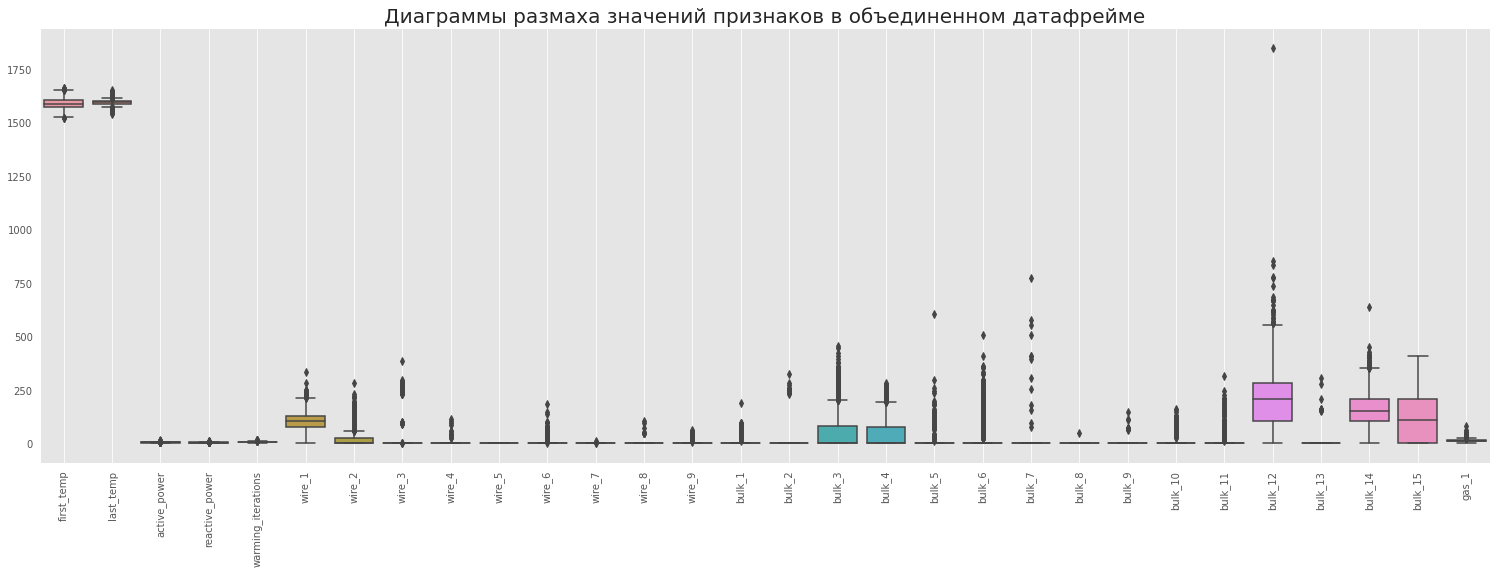

In [47]:
sns.set_style('darkgrid')
plt.style.use("ggplot")

plt.figure(figsize=(26, 8))
sns.boxplot(data=data.iloc[:, 1:])
plt.title('Диаграммы размаха значений признаков в объединенном датафрейме', fontsize=20)
plt.grid()
plt.xticks(rotation=90)
plt.show()

#### <tt>data.full_power</tt>

Добавим новый признак. Полную затраченную мощность можно рассчитать по следующей формуле: 

$$P_{total} = \sqrt{AP^2 + RP^2}$$

In [48]:
data['full_power'] = np.sqrt(data['active_power']**2 + data['reactive_power']**2)
data.head()

,key,first_temp,last_temp,active_power,reactive_power,warming_time,warming_iterations,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas_1,full_power
0,1,"1,571.00","1,613.00",3.04,2.14,0 days 00:18:18,5,60.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,43.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,0.00,150.00,154.00,29.75,3.72
1,2,"1,581.00","1,602.00",2.14,1.45,0 days 00:13:31,4,96.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,73.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,0.00,149.00,154.00,12.56,2.59
2,3,"1,596.00","1,599.00",4.06,2.94,0 days 00:10:55,5,91.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,205.00,0.00,152.00,153.00,28.55,5.01
3,4,"1,601.00","1,625.00",2.71,2.06,0 days 00:12:21,4,89.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,81.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,207.00,0.00,153.00,154.00,18.84,3.40
4,5,"1,576.00","1,602.00",2.25,1.69,0 days 00:14:29,4,89.24,9.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,78.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,203.00,0.00,151.00,152.00,5.41,2.82


---

Время нагрева переведем в секунды

In [49]:
data['warming_time'] = data['warming_time'].apply(lambda x: x.seconds)

---

Удалим признак <tt>key</tt>

In [50]:
data = data.drop(columns=['key'])

### Корреляции признаков

Добавление новых признаков может привести к возникновению мультиколлинеарности, что негативно влияет на качество работы линейных моделей. 

Требуется удостовериться в том, что в данных нет такой проблемы.

Выведем матрицу корреляции ВСЕХ признаков:

In [51]:
def corr_matrix(cm, annot_size=6, figsize=(16, 16)):
    fig, ax = plt.subplots(figsize=figsize)
    fig.suptitle(f'{cm.columns.name}. Матрица корреляции', fontsize=16, x=0.45,  y=0.87)
    hmap = sns.heatmap(cm,
                       ax=ax,
                       annot=True,
                       square=True,
                       fmt='.2f',
                       cbar=True,
                       annot_kws={'size':str(annot_size)},
                       cmap=sns.cubehelix_palette(as_cmap=True),
                       vmin=0, vmax=1)
    plt.show()

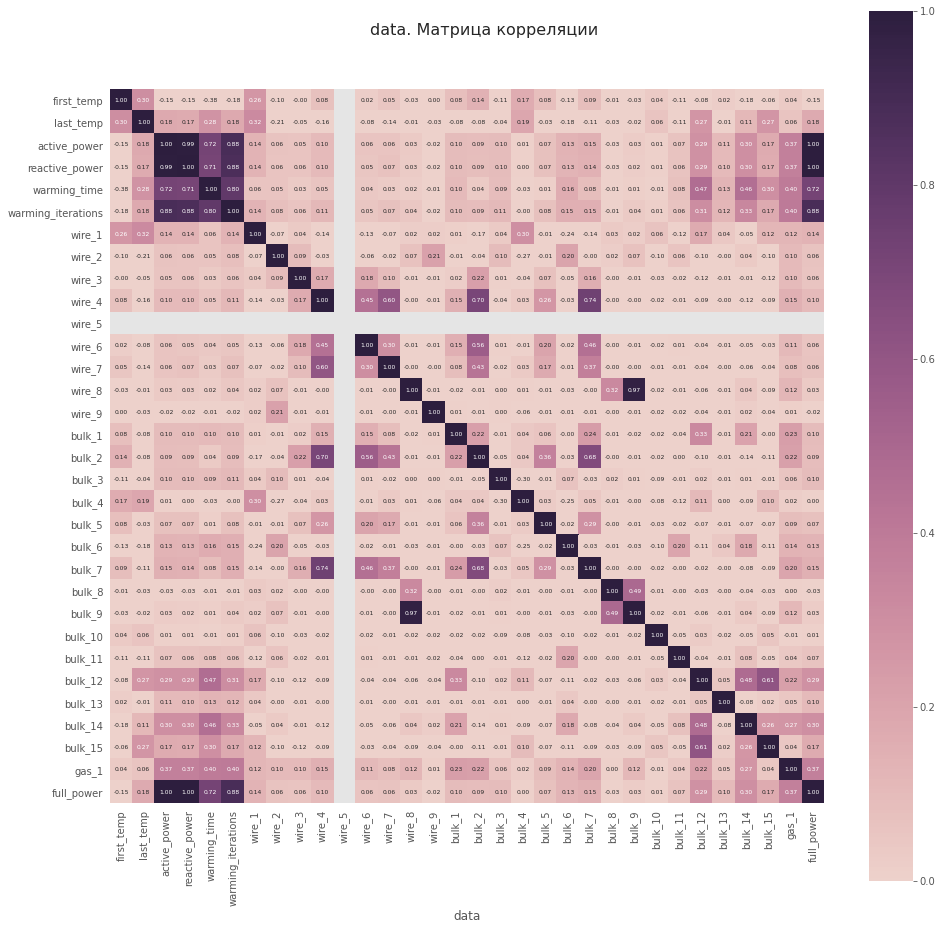

In [52]:
cm_ = data.corr()
cm_.columns.name = 'data'
    
corr_matrix(cm_)

Наблюдается наличие нескольких сильно коррелированных признаков.

Признак <tt>wire_5</tt> вообще не несет никакой информации. Его удалим из выборки.

Посмотрим отдельно на наиболее коррелирующие между собой пары признаков. Порог выставим в значение <tt>0.9</tt>

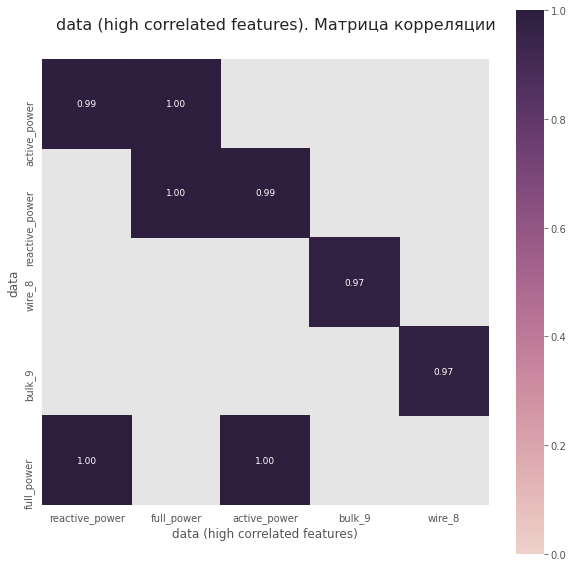

In [53]:
high_corr = cm_.unstack()[(cm_.unstack() > 0.9) & (cm_.unstack() < 1)].unstack()
high_corr.columns.name = 'data (high correlated features)'

corr_matrix(high_corr, 9, (10, 10))

По вполне очевидным причинам <tt>full_power</tt> зависит от <tt>reactive_power</tt> и <tt>active_power</tt>.

Эта же пара признаков сильно коррелирует между собой, поэтому их стоит удалить.

Высокое значение коэффициентов корреляции между некоторыми из признаков <tt>bulk</tt> и <tt>wire</tt> можно объяснить тем, что некоторые из добавок используют чаще других в определенных количествах. Стоит удалить один из признаков в таких парах.


Все вышеперечисленные факты подводят нас к мысли о том, что стоит оставить только признак <tt>full_power</tt>, так как он, по сути, является "собирательным" из всех остальных. Именно поэтому наблюдаются такие высокие значения коэффициентов на данном этапе.

Итого удаляем из выборки:

- <tt>wire_5</tt>;
- <tt>wire_8</tt>;
- <tt>active_power</tt>;
- <tt>reactive_power</tt>

In [54]:
data.drop(columns=['wire_5', 'wire_8', 'active_power', 'reactive_power'], inplace=True)

Еще взглянем на то, как признаки коррелируют с целевым значением чуть более подробно:

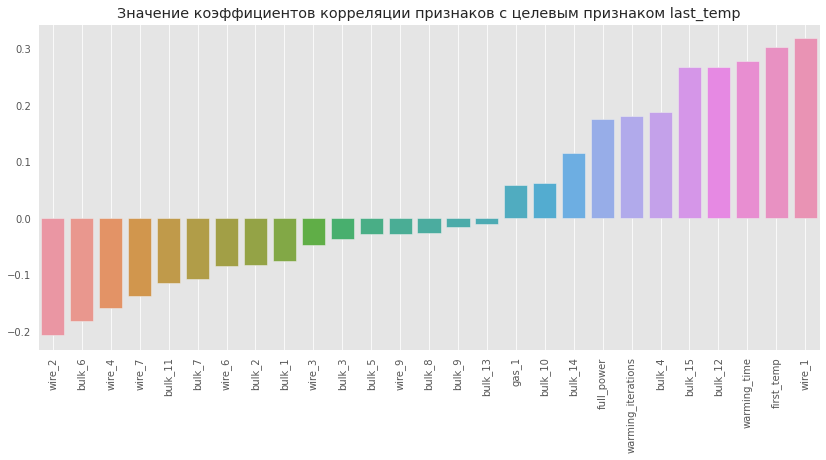

In [55]:
target_corr = data.corr().last_temp.sort_values()
target_corr = target_corr[target_corr < 1]

plt.figure(figsize=(14, 6))

sns.set_style('darkgrid')
plt.style.use("ggplot")

plt.title('Значение коэффициентов корреляции признаков с целевым признаком last_temp')

sns.barplot(x=target_corr.index, 
            y=target_corr.values)

plt.xticks(rotation=90)
plt.grid()
plt.show()

В общем, ничего криминального на графике не наблюдается. Признаки умеренно коррелируют с целевыми значениями. Диапазон значений примерно от -0.2 до 0.3

### Разделение данных на выборки

Данные будут разделены на трейн и тест в соотношении 75:25

In [56]:
target = data.last_temp
features = data.drop(columns=['last_temp'])

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=.25, random_state=RANDOM_STATE)

print(f'Размер трейн фичей: {X_train.shape}\n'
      f'Размер трейн таргета: {y_train.shape}\n'
      f'Размер тест фичей: {X_test.shape}\n'
      f'Размер тест таргета: {y_test.shape}')

Размер трейн фичей: (1743, 27)
Размер трейн таргета: (1743,)
Размер тест фичей: (582, 27)
Размер тест таргета: (582,)


### Значения-выбросы в тренировочной выборке

Для этого сначала выведем уже знакомый график с диаграммами размаха значений в каждом признаке

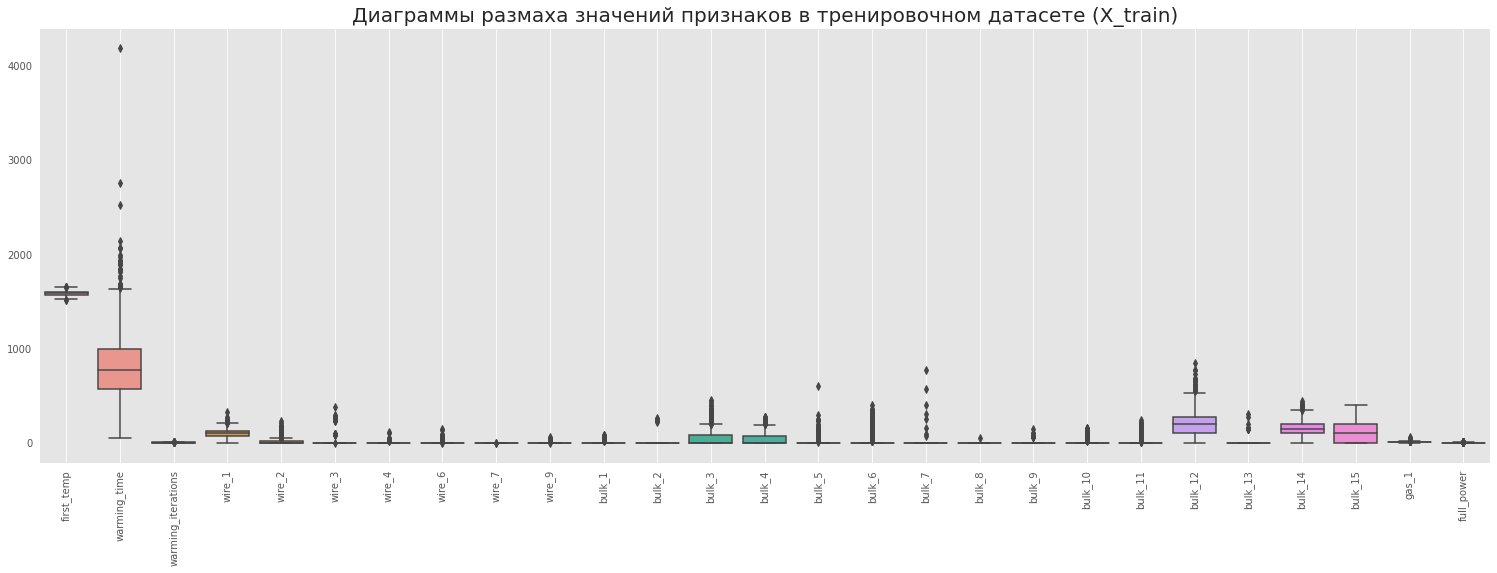

In [57]:
plt.figure(figsize=(26, 8))
sns.boxplot(data=X_train)
plt.title('Диаграммы размаха значений признаков в тренировочном датасете (X_train)', fontsize=20)
plt.grid()
plt.xticks(rotation=90)
plt.show()

Удаление выбивающихся значений в признаках типа <tt>bulk</tt> или <tt>wire</tt> довольно не разумно, так как в таком случае теряется довольно большой объем данных.

Видим довольно выделяющийся хвост из значений у признака <tt>warming_time</tt>, который хотелось бы обрезать. Здесь мы опять же рискуем наудалять лишнего, поэтому удалим из выборки объекты с слишком экстремальными значениями, то есть выше 2000 сек.

In [58]:
X_train.warming_time.describe()

count     1,743.00
mean        807.97
std         340.23
min          57.00
25%         575.50
50%         774.00
75%         997.00
max       4,189.00
Name: warming_time, dtype: float64

In [59]:
len(X_train.query('warming_time > 997'))

436

Собственно вот и подтверждение вышесказанному: верхний порог значений в виде 3-его квартиля сильно обрезает выборку.

In [60]:
len(X_train.query('warming_time > 2000'))

7

Так гораздо лучше!

In [61]:
i_to_drop = X_train.query('warming_time > 2000').index

X_train = X_train.drop(i_to_drop)

y_train = y_train.drop(i_to_drop)

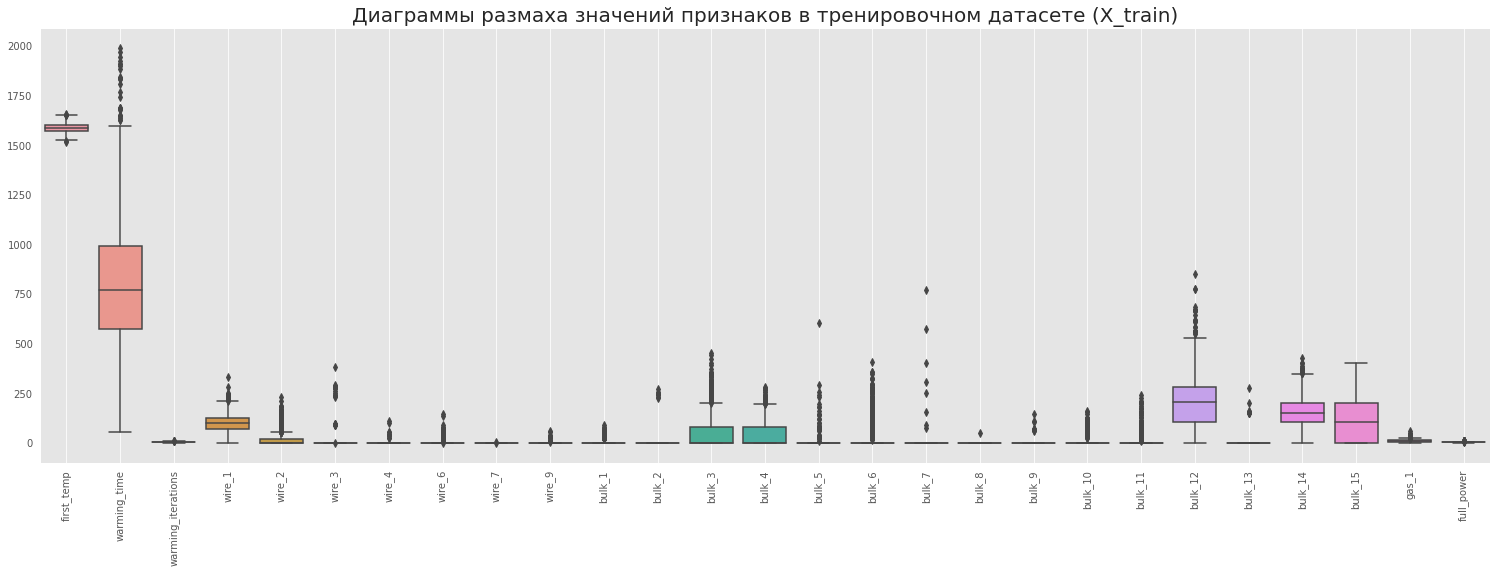

In [62]:
plt.figure(figsize=(26, 8))
sns.boxplot(data=X_train)
plt.title('Диаграммы размаха значений признаков в тренировочном датасете (X_train)', fontsize=20)
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [63]:
X_train.describe()

,first_temp,warming_time,warming_iterations,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_9,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas_1,full_power
count,"1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00","1,736.00"
mean,"1,587.41",800.97,4.66,102.26,16.97,2.80,0.29,0.88,0.00,0.19,3.35,1.14,48.26,37.91,2.56,22.41,1.52,0.03,0.52,4.88,4.16,207.68,0.99,152.14,119.93,11.24,3.86
std,23.33,319.30,1.53,43.84,32.16,26.31,4.53,7.79,0.12,2.74,11.51,16.74,76.67,58.86,23.32,55.90,27.19,1.18,6.84,20.38,22.27,153.81,13.32,79.04,84.58,6.06,1.45
min,"1,519.00",57.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.33
25%,"1,571.00",574.00,4.00,72.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,105.00,0.00,105.00,0.00,7.33,2.85
50%,"1,587.00",772.00,5.00,101.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,0.00,149.00,107.00,10.10,3.74
75%,"1,603.00",993.00,6.00,128.10,21.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,81.00,79.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,280.00,0.00,203.25,204.00,14.12,4.76
max,"1,658.00","1,992.00",12.00,330.31,231.57,385.01,113.23,145.14,5.04,62.03,90.00,270.00,454.00,281.00,603.00,407.00,772.00,49.00,147.00,159.00,242.00,853.00,278.00,428.00,405.00,60.94,10.91


### <tt>RobustScaler</tt>

Сразу нормализуем данные, так как будем рассматривать линейные модели.

Так как есть выбросы, то воспользуемся <tt>RobustScaler</tt>, а не <tt>StandardScaler</tt>.

In [64]:
scaler = RobustScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

display(X_train.head())
print()
X_test.head()

,first_temp,warming_time,warming_iterations,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_9,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas_1,full_power
0,0.56,1.06,0.50,0.17,2.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.00,0.00,125.00,0.00,0.00,0.00,0.00,0.00,1.15,0.00,0.67,0.47,0.14,0.68
1,-0.19,0.08,0.00,-0.75,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,103.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,-0.13,-0.02,0.13,0.39
2,0.28,-1.27,-2.00,-1.82,1.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.57,0.00,1.08,-0.52,-0.86,-1.69
3,-0.25,0.60,0.50,0.42,0.00,0.00,0.00,51.21,0.00,0.00,48.00,0.00,4.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.75,0.00,1.07,0.46,-0.45,0.42
4,0.47,0.68,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.64,0.00,0.65,-0.52,0.81,0.11


,first_temp,warming_time,warming_iterations,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_9,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas_1,full_power
0,-0.69,0.05,-0.50,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.11,0.00,-0.19,0.57,-0.28,-0.88
1,0.03,-0.95,-1.00,0.16,0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.18,0.00,-1.52,-0.52,0.42,-0.56
2,0.03,0.46,0.50,-0.22,0.00,0.00,0.00,0.00,0.00,0.00,92.00,0.00,0.00,2.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,0.00,-0.48,0.47,1.17,0.36
3,2.09,-0.54,0.00,0.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.18,0.00,0.58,-0.52,1.65,-0.27
4,-0.38,0.50,0.50,0.27,0.47,0.00,0.00,0.00,0.00,0.00,44.00,0.00,0.00,2.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.04,0.00,0.84,-0.52,1.18,0.75


<div style="border: 3px solid rgb(0,0,0); padding: 20px">

### Итого

- Переименовали все признаки в данных в формат <tt>snake_case</tt>;
- Выделили необходимые для обучения моделей признаки из различных датасетов;
- Заполнили пропуски в данных о добавках;
- Рассчитали новые признаки;
- Рассмотрели корреляционные матрицы для всех признаков и для целевого;
- Разделили данные на выборки;
- Удалили немногочисленные выбросы;
- Стандартизировали данные
    
</div>

## Шаг 4. Выбор модели 🦾

В этом этапе будем рассматривать в роли кандидатов следующие модели:

- GradientBoostingRegressor;
- CatBoostRegressor;
- XGBRegressor;
- RandomForestRegressor;
- LinearRegression

In [65]:
CV = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

In [66]:
TRAIN_INFO = {'Model' : [], 'Hyperparams' : [], 'CV MAE' : []}

### <tt>GradientBoostingRegressor</tt>

In [67]:
%%time

gbr = GradientBoostingRegressor(random_state=RANDOM_STATE)

gbr_params = {'learning_rate': [1e-3, 1e-1], 
              'n_estimators': [150, 250], 
              'max_depth': [3, 4],
              'tol' : [1e-4, 5e-5]}

gbr_gs = GridSearchCV(gbr, 
                      gbr_params, 
                      scoring='neg_mean_absolute_error',
                      cv=CV, 
                      refit=True, 
                      verbose=1, 
                      n_jobs=-1)

gbr_gs.fit(X_train, y_train)

gbr_hp = gbr_gs.best_params_
gbr_score = - gbr_gs.best_score_
gbr_model = gbr_gs.best_estimator_

TRAIN_INFO['Model'].append('GradientBoostingRegressor')
TRAIN_INFO['Hyperparams'].append(gbr_hp)
TRAIN_INFO['CV MAE'].append(gbr_score)

print(f'\nGradientBoostingRegressor.\n'
      f'Лучшее значение MAE на кросс-валидации: {round(gbr_score, 2)}', end='\n'*2)

Fitting 5 folds for each of 16 candidates, totalling 80 fits

GradientBoostingRegressor.
Лучшее значение MAE на кросс-валидации: 6.06

CPU times: user 57.4 s, sys: 42.7 ms, total: 57.5 s
Wall time: 57.5 s


### <tt>CatBoostRegressor</tt>

In [68]:
%%time

cbr = CatBoostRegressor(loss_function='MAE', verbose=False, random_seed=RANDOM_STATE)

cbr_params = {'learning_rate': [1e-5, 1e-3, 1e-1], 
              'n_estimators': [200, 250], 
              'max_depth': [4, 6],
              'l2_leaf_reg': [1, 10]}

cbr_gs = GridSearchCV(cbr, 
                      cbr_params, 
                      scoring='neg_mean_absolute_error',
                      cv=CV, 
                      refit=True, 
                      n_jobs=-1)

cbr_gs.fit(X_train, y_train)

cbr_hp = cbr_gs.best_params_
cbr_score = - cbr_gs.best_score_
cbr_model = cbr_gs.best_estimator_

TRAIN_INFO['Model'].append('CatBoostRegressor')
TRAIN_INFO['Hyperparams'].append(cbr_hp)
TRAIN_INFO['CV MAE'].append(cbr_score)


print(f'\nCatBoostRegressor.\n'
      f'Лучшее значение MAE на кросс-валидации: {round(cbr_score, 2)}', end='\n'*2)


CatBoostRegressor.
Лучшее значение MAE на кросс-валидации: 5.99

CPU times: user 56.5 s, sys: 2.53 s, total: 59.1 s
Wall time: 2min 32s


### <tt>XGBRegressor</tt>

In [69]:
%%time

xgbr = XGBRegressor(random_state=RANDOM_STATE)

xgbr_params = {'learning_rate': [1e-3, 1e-1, 5e-1], 
               'n_estimators': [150, 200, 250], 
               'booster': ['gblinear', 'gbtree']}

xgbr_gs = GridSearchCV(xgbr, 
                       xgbr_params, 
                       scoring='neg_mean_absolute_error',
                       cv=CV, 
                       refit=True,
                       verbose=1,
                       n_jobs=-1)

xgbr_gs.fit(X_train, y_train)

xgbr_hp = xgbr_gs.best_params_
xgbr_score = - xgbr_gs.best_score_
xgbr_model = xgbr_gs.best_estimator_

TRAIN_INFO['Model'].append('XGBRegressor')
TRAIN_INFO['Hyperparams'].append(xgbr_hp)
TRAIN_INFO['CV MAE'].append(xgbr_score)

print(f'\nXGBRegressor.\n'
      f'Лучшее значение MAE на кросс-валидации: {round(xgbr_score, 2)}', end='\n'*2)

Fitting 5 folds for each of 18 candidates, totalling 90 fits

XGBRegressor.
Лучшее значение MAE на кросс-валидации: 6.14

CPU times: user 8min 34s, sys: 3.75 s, total: 8min 38s
Wall time: 8min 43s


### <tt>RandomForestRegressor</tt>

In [70]:
%%time

rfr = RandomForestRegressor(random_state=RANDOM_STATE)

rfr_params = {'n_estimators': [150, 250, ], 
              'max_depth': [3, 4, 6],
              'min_samples_leaf': [1, 2, 3]}

rfr_gs = GridSearchCV(rfr, 
                       rfr_params, 
                       scoring='neg_mean_absolute_error',
                       cv=CV, 
                       refit=True,
                       verbose=1,
                       n_jobs=-1)

rfr_gs.fit(X_train, y_train)

rfr_hp = rfr_gs.best_params_
rfr_score = - rfr_gs.best_score_
rfr_model = rfr_gs.best_estimator_

TRAIN_INFO['Model'].append('RandomForestRegressor')
TRAIN_INFO['Hyperparams'].append(rfr_hp)
TRAIN_INFO['CV MAE'].append(rfr_score)

print(f'\nRandomForestRegressor.\n'
      f'Лучшее значение MAE на кросс-валидации: {round(rfr_score, 2)}', end='\n'*2)

Fitting 5 folds for each of 18 candidates, totalling 90 fits

RandomForestRegressor.
Лучшее значение MAE на кросс-валидации: 6.23

CPU times: user 59.8 s, sys: 320 ms, total: 1min
Wall time: 1min


### <tt>LinearRegression</tt>

Удалим мультикоррелирующий признак <tt>wire_8</tt>

In [71]:
%%time

lr = make_pipeline(RobustScaler(),     # Используем Robust, а не Standard,
                   LinearRegression()) # так как у него выше устройчивость к выбросам

lr_cv = cross_val_score(lr, 
                        X_train, 
                        y_train, 
                        cv=CV, 
                        scoring='neg_mean_absolute_error')

lr_score = abs(lr_cv).mean()

TRAIN_INFO['Model'].append('LinearRegression')
TRAIN_INFO['Hyperparams'].append('')
TRAIN_INFO['CV MAE'].append(lr_score)

print(f'\nLinearRegression.\n'
      f'Лучшее значение MAE на кросс-валидации: {round(lr_score, 2)}', end='\n'*2)


LinearRegression.
Лучшее значение MAE на кросс-валидации: 6.67

CPU times: user 292 ms, sys: 439 ms, total: 731 ms
Wall time: 666 ms


---

Выведем итоговую таблицу:

In [72]:
TRAIN_INFO_DF = round(pd.DataFrame(TRAIN_INFO).sort_values('CV MAE').reset_index(drop=True), 2)

TRAIN_INFO_DF

,Model,Hyperparams,CV MAE
0,CatBoostRegressor,"{'l2_leaf_reg': 10, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}",5.99
1,GradientBoostingRegressor,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'tol': 0.0001}",6.06
2,XGBRegressor,"{'booster': 'gbtree', 'learning_rate': 0.1, 'n_estimators': 150}",6.14
3,RandomForestRegressor,"{'max_depth': 6, 'min_samples_leaf': 3, 'n_estimators': 150}",6.23
4,LinearRegression,,6.67


<div style="border: 3px solid rgb(0,0,0); padding: 20px">

### Итого
    
Лучшие результаты на кросс-валидации показывает модель <tt>CatBoostRegressor</tt> c такими гиперпараметрами:
    
<clear></clear>
    
<center><tt>CatBoostRegressor(iterations=200, learning_rate=0.1, depth=4, l2_leaf_reg=10, loss_function='MAE')</tt></center>
    
---    

<clear></clear>
    
$$MAE_{cross\_validation} = 5.99$$
    
</div>

## Шаг 5. Тестирование модели 🧪

### Метрики на тестовой выборке

In [73]:
model = cbr_model
params = TRAIN_INFO_DF['Hyperparams'][0]

test_preds = model.predict(X_test)

test_mae = round(mean_absolute_error(y_test, test_preds), 3)

test_r2 = round(r2_score(y_test, test_preds), 3)


print(f'CatBoostRegressor({", ".join([f"{k}={v}" for k, v in params.items()])}).\n'
      f'Значение MAE на тесте: {round(test_mae, 2)}\n'
      f'Значение R2 на тесте: {round(test_r2, 2)}', end='\n'*2)

CatBoostRegressor(l2_leaf_reg=10, learning_rate=0.1, max_depth=4, n_estimators=200).
Значение MAE на тесте: 6.43
Значение R2 на тесте: 0.32



На тестовых данных для модели были рассчитаны две метрики: $MAE_{test}$ и $R^2_{test}$. 

Значение второй было посчитано дополнительно по требованию заказчика.

---

$MAE_{test} = 6.43$, что удовлетворяет ТЗ: $MAE_{test} ⩽ 6.8$.

Значение $R^2_{test}$ не слишком впечатляющее. С высокой долей вероятности это связано с тем, что для качественного обучения модели данных оказалось недостаточно. Размер тренировочной выборки получился чуть больше чем $1700$ объектов.

То есть, если планируется улучшать качество модели в дальнейшем, то стоит получить/собрать данные по бóльшему количеству партий. Тюнингом гиперпараметров тут уже не обойтись

### <tt>DummyRegressor</tt>, проверка модели на адекватность

In [74]:
dr = DummyRegressor(strategy='mean')

dr.fit(X_train, y_train)

dr_test_preds = dr.predict(X_test)

dr_score = round(mean_absolute_error(y_test, dr_test_preds), 3)

print(f'DummyRegressor(strategy=\'mean\')\n'
      f'Значение MAE на тесте: {dr_score}')

DummyRegressor(strategy='mean')
Значение MAE на тесте: 8.049


### Важность признаков

Извлечем коэффициенты "важности вклада" значений признаков в значение целевой переменной. Их хранит атрибут <tt>feature_importances_</tt>

In [75]:
coefs = model.feature_importances_

feature_importances = pd.DataFrame(zip(X_train.columns, coefs), columns=['features', 'coef'])
feature_importances = feature_importances.sort_values('coef', ascending=False).reset_index()

feature_importances

,index,features,coef
0,1,warming_time,28.01
1,0,first_temp,21.68
2,15,bulk_6,9.76
3,3,wire_1,5.85
4,4,wire_2,5.49
5,24,bulk_15,4.06
6,21,bulk_12,4.04
7,25,gas_1,3.66
8,23,bulk_14,3.28
9,10,bulk_1,3.11


Построим график

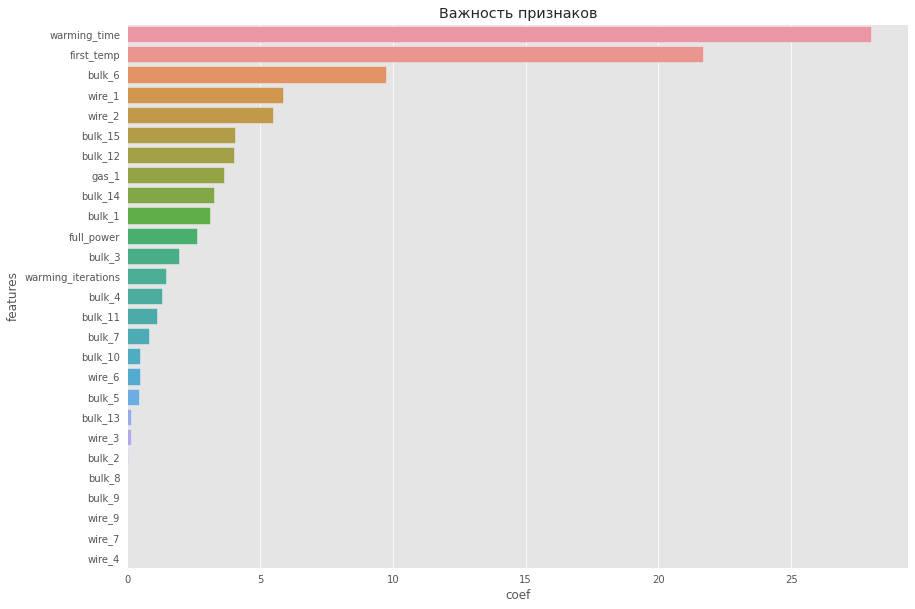

In [76]:
plt.figure(figsize=(14, 10))
plt.title('Важность признаков')

sns.barplot(x=feature_importances.coef, 
            y=feature_importances.features, 
            orient='h')

plt.show()

Видим, что признаки <tt>wire_4, wire_7, wire_9, wire_3</tt> и <tt>bulk_9, bulk_8, bulk_2, bulk_13</tt> практически не влияют на результат предсказаний, но в целом мы достигли необходимого качества модели.

Некоторые из дополнительно рассчитанных признаков (н-р <tt>warming_time, full_power</tt>) вносят значимый вклад в результат предсказаний ⇒ добавлены они были не зря

<div style="border: 3px solid rgb(0,0,0); padding: 20px">

### Итого
    
- Рассчитали $R^2$ и $MAE$ для лучшей модели на тестовой выборке. Полученные значение удовлетворяют техническим требованиям заказчика. $MAE_{test} = 6.43$;
- Модель прошла проверку на адекватность (сравнение с константной моделью): $MAE_{CatBoostRegressor} > MAE_{DummyRegressor}$;
- Исседовали значения коэффциентов влияния отдельных признаков на предсказанное моделью значение целевой переменной
</div>

## Шаг 6. Общий вывод 👀

<div style="border: 3px solid rgb(119,212,150); padding: 20px">
    
Нам требовалось разработать прототип модели машинного обучения для решения задачи уменьшения электропотребления на металлургическом комбинате ООО «Так закаляем сталь» путем прогнозирования значения температуры сплава на одном из ключевых этапов производства. Модель была построена и протестирована. Получены удовлетворяющие требованию заказчика значения метрик качества предсказаний модели.
    
### Краткая сводка по выполненным задачам
    
#### Введение.
    
- Приведено подробное описание технологического процесса на комбинате;
- Приведено описание исходных данных;
- Построен план работы;
- Сформулирована цель проекта;

#### Шаг 1. Оценка ТЗ
    
- Дана первичная оценка и приведены идеи по реализации проекта;
    

#### Шаг 2. Исследовательский анализ данных

- Были импортированы необходимые для проведения этапа модули;
- Выстроена система получения данных с обработкой ошибок;
- Составлена сводная таблица с типами данных признаков в каждом из датасетов;
- По каждому из датасетов рассмотрели:
    - Краткие информационные сводки (методы <tt>.info()</tt>, <tt>.head()</tt>, <tt>.describe()</tt>);
    - Сводные таблицы по количеству пропусков;
    - Уникальность значений первичного ключа (признак <tt>key</tt>). Информация пригодиться для последующей агрегации данных;
    - <i>(где требовалось)</i> Распределения значений признаков (гистограмма+диаграмма размаха)

#### Шаг 3. Предобработка данных
    
- Переименовали все признаки в данных в формат <tt>snake_case</tt>;
- Выделили необходимые для обучения моделей признаки из различных датасетов;
- Заполнили пропуски в данных о добавках;
- Рассчитали новые признаки;
- Рассмотрели корреляционные матрицы для всех признаков и для целевого;
- Разделили данные на выборки;
- Удалили немногочисленные выбросы;
- Стандартизировали данные;

#### Шаг 4. Обучение моделей
    
<center>Итоговая сводная таблица с результатами этапа</center>
  
| Model                     | Hyperparams                                                                      | CV MAE |
|---------------------------|----------------------------------------------------------------------------------|--------|
| CatBoostRegressor         | {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 10, 'learning_rate': 0.1}         | 5.99   |
| GradientBoostingRegressor | {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'tol': 0.0001} | 6.06   |
| XGBRegressor | {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}       | 6.14   |
| RandomForestRegressor     | {'max_depth': 6, 'min_samples_leaf': 3, 'n_estimators': 150}                     | 6.23   |
| LinearRegression          |                                                                                  | 6.67   |

<clear></clear>
<center>Исходя из критериев заказчика была выбрана модель</center>
    
<center><tt>CatBoostRegressor(iterations=200, learning_rate=0.1, depth=4, l2_leaf_reg=10, loss_function='MAE')</tt></center>
    
#### Шаг 5. Тестирование модели
    
- Модель была протестирована на тестовом наборе данных. $MAE_{test} = 6.43$, $R^2_{test} = 0.32$;
- Модель была проверена на адекватность. Модель адекватна.   
- Исследовано влияние отдельных признаков на прогноз
    
    
    
### Что могло привести к получению неполноценных результатов?
    
- Малый объем данных;
    > Моделям требуется большее количество тренировочных объектов в выборке. Вероятно, это может существенно улучшить качество предсказаний. Отследить это помогло значение метрики $R^2_{test}$.
    
- Большое количество пропущенных значений в данных о добавляемых примесях;
    > Практически половина признаков в этих датасетах не содержали полезной для исследования информации. Возможно, стоит собрать больше информаций о партиях, где малоиспользуемые добавки все же использовали.
</div>

## Отчет о проделанной работе ✅

<div style="border: 3px solid rgb(33, 177, 230); padding: 20px">
    
### Сравнение приведенного решения и плана работы
    
Для удобства восприятия подэтапы решения будут отмечены символом ✅, если они были полностью выполнены.

Если подэтап выполнен не был, либо был выполнен частично, то он будет отмечен символом ❌. Также будет приведено обоснование того, почему этот шаг не был выполнен.
    
   
#### Шаг 1. Оценка технического задания | ✅ [100% выполнение этапа]

- Была описана суть выполняемого проекта; ✅
- Сформулирован [план работы](#Введение.-План-работы-📑); ✅
- Были определены задачи проекта: ✅
    > 1. Провести корректную предобработку данных и получить готовый для обучения и тестирования моделей датафрейм; 
    2. Рассмотреть и проверить при помощи кросс-валидации эффективность минимум 2-х разных моделей; 
    3. Подобрать наиболее подходящие гиперпараметры моделей и воспользоваться одной или несколькими техниками для улучшения качества предсказаний модели.
    
#### Шаг 2. Исследовательский анализ данных | ✅ [100% выполнение этапа]
    
- Изучение данных; ✅
- Изучение основной информации об исходных данных; ✅
- Оценка полученной информации для выполнения следующего этапа; ✅
    > Были построены гистограммы+диаграммы размаха для ключевых признаков в каждом из датасетов

#### Шаг 3. Предобработка данных | ✅ [100% выполнение этапа]

- Устранение пропущенных значений; ✅
    > Пропуски были только в <tt>data_wire_new</tt> и <tt>data_bulk_new</tt>. [7.3 Удаление пропусков в <tt>data_wire_new</tt> и <tt>data_bulk_new</tt>](#data_wire_new-&amp;-data_bulk_new)
- Изменение типов данных в признаках; ✅
    > Работа с датой и временем. Представление данных в необходимых для проведения вычислений единицах измерения
- Добавление новых признаков; ✅
    > Добавили: <tt>warming_iterations</tt> - кол-во итераций нагрева для партии, <tt>warming_time</tt> - общее время нагрева в секундах, <tt>full_power</tt> - полная затраченная мощность
- Создание и сохранение предобработанных выборок с данными; ✅
    > [7.5 Объединение датасетов](#Объединение-датасетов). Выполнение <tt>Задачи 1</tt>.
- Удаление неинформативных/коллинеарных признаков; ✅
    > [7.6 Корреляции признаков](#Корреляции-признаков). Выполнение <tt>Задачи 3</tt> на <tt>33%</tt>
- Разделение данных на тренировочную, валидационную и тестовую выборки; ✅
    > [7.7 Разделение данных на выборки](#Разделение-данных-на-выборки)
- Нормализация/стандартизация значений; ✅
    > [7.9 RobustScaler](#RobustScaler). Выполнение <tt>Задачи 3</tt> на <tt>66%</tt>
    
#### Шаг 4. Выбор модели | ✅ [100% выполнение этапа]
    
- Формирования пула моделей для их обучения; ✅
    > Перед началом этапа определились с теми моделями, которые будем проверять на кросс-валидации и подбирать для них гиперпараметры. <tt>GradientBoostingRegressor</tt>, <tt>CatBoostRegressor</tt>, <tt>XGBRegressor</tt>, <tt>RandomForestRegressor</tt>, <tt>LinearRegression</tt>
- Обучение моделей, подбор гиперпараметров; ✅
    > Произведен подбор гиперпараметров моделей с помощью GridSearchCV. Модели обучены на тренировочной выборке. Выполнение <tt>Задачи 3</tt> на <tt>100%</tt>
- Оценка качества моделей при помощи кросс-валидации; ✅
    > Получено значение метрики $MAE_{cross\_validation}$ для каждой из моделей. Выполнение <tt>Задачи 2</tt>
- Выбор модели для тестирования; ✅
    > Результаты оценки моделей на кросс-валидации были собраны в единую таблицу. Выбрали лучшую модель, которую будем тестировать. Ею оказалась модель <tt>CatBoostRegressor</tt>
    
#### Шаг 5. Тестирование модели | ✅ [100% выполнение этапа]
    
- Проверка качества модели на тестовой выборке; ✅
    > Модель была протестирована. Получены значения метрик ($MAE_{test}, R^2_{test}$) для тестовой выборки. 
- Проверка модели на адекватность; ✅
    > Так как значения метрик, полученные на предыдущем подэтапе, удовлетворили критериям ТЗ, то модель была проверена на адекватность. Модель получилась адекватная.
    
#### Шаг 6. Общий вывод | ✅ [100% выполнение этапа]

- Подведение итогов проекта; ✅
    > Была кратко описана суть работы. Приведено описание ключевых моментов проекта
    
---

<font size="3">**Итого**</font>: <b>Выполнено $100$% запланированного</b>

---
    
### Описание трудностей проекта и способов их решения
    
- Понимание технологического процесса обработки стали на комбинате;
    > Проблема была решена путем дополнительного, более детального ознакомления с технологическим процессом обработки металлов
- Необходимость добавления новых признаков;
    > Это было нужно для того, чтобы пройти порог по ключевой для заказчика метрике. Использованы физические формулы для рассчета дополнительных признаков.

### Описание ключевых шагов решения

- <tt>Предобработка данных<tt>;
    > От качества предобработки данных зависит то, научится ли модель определять скрытые зависимости в данных. Это напрямую влияет на итоговое качество предсказаний.

- <tt>Выбор модели</tt>;
    > Безусловно важный шаг в проекте, который также сильно влияет на итоговое качество предсказаний. Выбор алгоритма и подбор гиперпараметров модели под конкретные данные оказывает существенное влияние на итоговые значения метрик на тестовой выборке.
    
### Признаки, использовавшиеся для обучения модели
            
<font size="3">**Фичи**</font>
    
- <tt>first_temp [float64]</tt>;
    > Первый замер температуры по конкретной партии. Признак был получен при агрегации данных <tt>data_temp_new.csv</tt> по <tt>key, time</tt>
- <tt>full_power [float64]</tt>;
    > Полная затраченная на нагрев мощность (суммарная по всем итерациям нагрева). Была рассчитана как $P_{total} = \sqrt{sum(ActPwr)^2 + sum(ReactPwr)^2}$ 
- <tt>warming_time [timedelta64[ns]]</tt>;
    > Суммарное время нагрева по всем итерациям нагрева в секундах. Рассчитали путем суммирования времени, затраченного на каждую итерацию. Перевели в секунды
- <tt>warming_iterations [int64]</tt>;
    > Количество итераций нагрева. Подсчитали количество записей для каждой уникальной партии.
- <tt>wire_1 [float64]</tt>, <tt>wire_2 [float64]</tt>, <tt>wire_3 [float64]</tt>, <tt>wire_4 [float64]</tt>, <tt>wire_5 [float64]</tt>, <tt>wire_6 [float64]</tt>, <tt>wire_7 [float64]</tt>, <tt>wire_9 [float64]</tt>;
    > Количество добавленных различных сыпучих добавок. Было много пропусков, которые заменили нулями по согласованию с заказчиком
- <tt>bulk_1 [float64]</tt>, <tt>bulk_2 [float64]</tt>, <tt>bulk_3 [float64]</tt>, <tt>bulk_4 [float64]</tt>, <tt>bulk_5 [float64]</tt>, <tt>bulk_6 [float64]</tt>, <tt>bulk_7 [float64]</tt>, <tt>bulk_8 [float64]</tt>, <tt>bulk_9 [float64]</tt>, <tt>bulk_10 [float64]</tt>, <tt>bulk_11 [float64]</tt>, <tt>bulk_12 [float64]</tt>, <tt>bulk_13 [float64]</tt>, <tt>bulk_14 [float64]</tt>, <tt>bulk_15 [float64]</tt>;
    > Количество добавленных различных проволочных добавок. Было много пропусков, которые заменили нулями по согласованию с заказчиком
- <tt>gas_1 [float64]</tt>;
    > Суммарный объем газа, использовавшийся в процессе продувки сплава
    
<font size="3">**Таргет**</font>

- <tt>last_temp [float64]</tt>
    > Последний замер температуры по конкретной партии. Признак был получен при агрегации данных <tt>data_temp_new.csv</tt> по <tt>key, time</tt>
    
### Описание итоговой модели
    
Протестирована была следующая модель:
    
<clear></clear>
    
<center><tt>CatBoostRegressor(iterations=200,
                   learning_rate=0.1,
                   depth=4,
                   l2_leaf_reg=10,
                   loss_function='MAE',
                   random_state=280823)</tt></center>
    
---
    
Полученные значения метрик:
    
$$MAE_{test} = 6.43$$
    
$$R^2_{test} = 0.32$$
    
    
    
</div>